In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Optional, Union
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from plots import ForexPlotter

from data_handle import (
    ForexDataClean,
    ForexDataLoad,
    ForexPctChange,
    ForexQuickLook,
)

from features import (
    ForexCustomFeatures,
    ForexMomentumIndicators,
    ForexTrendIndicators,
    ForexTSFeatures,
    ForexVolatilityIndicators,
    ForexVolumeIndicators,
    ForexMASignals,
    ForexMACDSignals,
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = ForexDataLoad(file_path = '../data/xauaud.csv').data
df_without_atr_vol_returns = ForexDataLoad(file_path = '../data/xauaud.csv').data

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)



In [3]:
cleaner = ForexDataClean(data = data, fast_clean = True)
data = cleaner.data

FOREX DATA CLEANER
 Available Fuctions 
1 remove_duplicates 
2 handle_missing_values 
3 validate_ohlc_integrity 
4 handle_outliers
Keep = first and subset = None
Removed 0 duplicate entries
Found 1 missing values
 dropped: 1 missing values .
OUTLIER DETECTION AND HANDLING
Method: quantile, Strategy: cap, Threshold: 3.0
Remove outliers: False
--------------------------------------------------
open: Found 766 outliers (383 low, 383 high)
Bounds: [1817.81300 - 5218.90300]
Original range: [1674.10000 - 5476.98000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

high: Found 764 outliers (381 low, 383 high)
Bounds: [1819.15000 - 5224.87300]
Original range: [1676.91000 - 5483.78000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

low: Found 766 outliers (383 low, 383 high)
Bounds: [1816.29450 - 5211.65900]
Original range: [1671.60000 - 5474.51000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

close: Found 76

In [4]:
add_volatility = ForexVolatilityIndicators(data = data)

VOLATILITY INDICATORS
 Available Fuctions 
1 add_atr 
2 add_bollinger_bands 
3 add_keltner_channels 
4 add_standard_deviation  
5 get_all_volatility_indicators


In [5]:
data = add_volatility.get_all_volatility_indicators()

In [6]:
data.tail(10)

,open,high,low,close,volume,vol_atr_14,vol_atr_21,vol_atr_28,vol_bb_upper_20,vol_bb_middle_20,vol_bb_lower_20,vol_bb_upper_50,vol_bb_middle_50,vol_bb_lower_50,vol_keltner_middle,vol_keltner_upper,vol_keltner_lower,vol_std_dev_20,vol_std_dev_50,vol_std_dev_100
datetime,,,,,,,,,,,,,,,,,,,,
2025-09-05 11:00:00,5421.73,5425.39,5415.28,5417.88,0,14.148133,14.579162,14.738345,5459.811894,5441.1630,5422.514106,5462.741921,5434.0978,5405.453679,5436.484861,5463.965423,5409.004298,9.324447,14.322061,57.792779
2025-09-05 12:00:00,5417.88,5429.94,5417.73,5427.42,0,14.009695,14.466345,14.648047,5460.071856,5440.4835,5420.895144,5462.661627,5434.2568,5405.851973,5435.621540,5462.796047,5408.447034,9.794178,14.202413,56.634311
2025-09-05 13:00:00,5427.42,5428.38,5421.64,5427.78,0,13.490431,14.098424,14.365617,5460.351910,5440.0690,5419.786090,5462.657336,5434.2324,5405.807464,5434.874727,5460.679783,5409.069671,10.141455,14.212468,55.188630
2025-09-05 14:00:00,5427.78,5431.89,5422.54,5431.70,0,13.194686,13.872309,14.186488,5459.494274,5439.2495,5419.004726,5462.549406,5434.5154,5406.481394,5434.572372,5459.666922,5409.477822,10.122387,14.017003,54.256884
2025-09-05 15:00:00,5431.90,5467.02,5422.86,5447.40,0,15.406494,15.314580,15.256971,5458.044297,5438.8385,5419.632703,5463.087890,5434.9696,5406.851310,5435.794051,5467.211146,5404.376956,9.602899,14.059145,53.994257
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,15.951745,15.682457,15.534936,5457.782513,5438.7805,5419.778487,5463.633915,5435.8618,5408.089685,5437.624141,5470.507527,5404.740756,9.501006,13.886057,53.575516
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,16.460192,16.034244,15.804045,5465.025034,5440.4165,5415.807966,5466.419475,5436.9340,5407.448525,5441.149461,5475.358508,5406.940414,12.304267,14.742737,53.428630
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,16.602321,16.149280,15.898544,5469.104926,5441.6360,5414.167074,5468.401278,5437.7528,5407.104322,5443.753322,5478.231465,5409.275180,13.734463,15.324239,53.194591
2025-09-05 19:00:00,5468.33,5483.78,5466.57,5476.84,0,16.645726,16.199791,15.945381,5474.655038,5443.1985,5411.741962,5471.135344,5438.7294,5406.323456,5446.904434,5481.376762,5412.432106,15.728269,16.202972,53.074741


In [7]:
add_trend = ForexTrendIndicators(data = data)

TREND INDICATORS
 Available Fuctions: 
1 add_sma 
2 add_ema 
3 add_macd 
4 add_adx 
5 add_parabolic_sar


In [8]:
data = add_trend.get_all_trend_indicators()

In [9]:
data.tail(10)

,open,high,low,close,volume,vol_atr_14,vol_atr_21,vol_atr_28,vol_bb_upper_20,vol_bb_middle_20,...,trend_ema_100_slope,trend_ema_200,trend_ema_200_slope,trend_macd,trend_macd_signal,trend_macd_hist,trend_adx,trend_plus_di,trend_minus_di,trend_parabolic_sar
datetime,,,,,,,,,,,,,,,,,,,,,
2025-09-05 11:00:00,5421.73,5425.39,5415.28,5417.88,0,14.148133,14.579162,14.738345,5459.811894,5441.1630,...,0.607962,5329.105186,0.892209,0.005562,3.273904,-3.268342,13.616536,15.071611,27.548188,5453.848998
2025-09-05 12:00:00,5417.88,5429.94,5417.73,5427.42,0,14.009695,14.466345,14.648047,5460.071856,5440.4835,...,0.784834,5330.083443,0.978257,-0.650450,2.489033,-3.139483,14.228368,16.453183,25.833236,5450.763478
2025-09-05 13:00:00,5427.42,5428.38,5421.64,5427.78,0,13.490431,14.098424,14.365617,5460.351910,5440.0690,...,0.776422,5331.055548,0.972105,-1.128290,1.765569,-2.893858,14.796498,15.866024,24.911333,5447.924800
2025-09-05 14:00:00,5427.78,5431.89,5422.54,5431.70,0,13.194686,13.872309,14.186488,5459.494274,5439.2495,...,0.838671,5332.056986,1.001437,-1.177101,1.177035,-2.354136,14.915738,16.963071,23.650431,5445.313216
2025-09-05 15:00:00,5431.90,5467.02,5422.86,5447.40,0,15.406494,15.314580,15.256971,5458.044297,5438.8385,...,1.132955,5333.204677,1.147692,0.050493,0.951726,-0.901234,15.462944,29.777290,18.808303,5415.280000
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,15.951745,15.682457,15.534936,5457.782513,5438.7805,...,1.261213,5334.416670,1.211993,1.618773,1.085136,0.533637,15.971064,26.705218,16.867883,5416.314800
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,16.460192,16.034244,15.804045,5465.025034,5440.4165,...,1.624951,5335.811927,1.395257,4.394961,1.747101,2.647860,17.384413,32.077099,15.179211,5417.328904
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,16.602321,16.149280,15.898544,5469.104926,5441.6360,...,1.470992,5337.132107,1.320180,6.029353,2.603551,3.425802,18.829879,30.830188,13.974317,5419.627748
2025-09-05 19:00:00,5468.33,5483.78,5466.57,5476.84,0,16.645726,16.199791,15.945381,5474.655038,5443.1985,...,1.607210,5338.522236,1.390128,7.907246,3.664290,4.242956,20.430768,31.110880,12.942315,5423.119283


In [10]:
add_momentum = ForexMomentumIndicators(data = data)

MOMENTUM INDICATORS
 Available Fuctions 
1 add_rsi 
2 add_stochastic 
3 add_williams_r 
4 add_cci 
5 add_momentum 
6 get_all_momentum_indicators


In [11]:
data = add_momentum.get_all_momentum_indicators()

In [12]:
data.tail(10)

,open,high,low,close,volume,vol_atr_14,vol_atr_21,vol_atr_28,vol_bb_upper_20,vol_bb_middle_20,...,momen_rsi_21_trend,momen_rsi_28,momen_rsi_28_trend,momen_stoch_slowk,momen_stoch_slowd,momen_williams_r,momen_cci,momen_momentum_10,momen_momentum_14,momen_momentum_20
datetime,,,,,,,,,,,,,,,,,,,,,
2025-09-05 11:00:00,5421.73,5425.39,5415.28,5417.88,0,14.148133,14.579162,14.738345,5459.811894,5441.1630,...,-1.312349,49.109839,-1.043940,13.131102,27.527613,-93.281654,-260.107454,-13.96,-24.04,-22.38
2025-09-05 12:00:00,5417.88,5429.94,5417.73,5427.42,0,14.009695,14.466345,14.648047,5460.071856,5440.4835,...,3.599209,51.625410,2.515571,14.891953,17.453334,-68.630491,-157.023124,-18.89,-16.68,-13.59
2025-09-05 13:00:00,5427.42,5428.38,5421.64,5427.78,0,13.490431,14.098424,14.365617,5460.351910,5440.0690,...,0.132832,51.718806,0.093396,23.462532,17.161863,-67.700258,-123.113399,-14.17,-17.81,-8.29
2025-09-05 14:00:00,5427.78,5431.89,5422.54,5431.70,0,13.194686,13.872309,14.186488,5459.494274,5439.2495,...,1.470799,52.748957,1.030151,35.366064,24.573516,-57.571059,-86.038427,-8.21,-6.79,-16.39
2025-09-05 15:00:00,5431.90,5467.02,5422.86,5447.40,0,15.406494,15.314580,15.256971,5458.044297,5438.8385,...,5.352749,56.595460,3.846503,45.602770,34.810455,-37.920371,58.033198,9.67,15.56,-8.22
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,15.951745,15.682457,15.534936,5457.782513,5438.7805,...,2.300725,58.301746,1.706286,60.432118,47.133651,-23.212215,85.212017,7.28,8.70,-1.16
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,16.460192,16.034244,15.804045,5465.025034,5440.4165,...,5.170344,62.269453,3.967707,79.532866,61.855918,-0.268817,220.359631,23.77,32.69,32.72
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,16.602321,16.149280,15.898544,5469.104926,5441.6360,...,-2.499583,60.402115,-1.867338,87.200172,75.721719,-14.918452,197.729686,25.95,28.58,24.39
2025-09-05 19:00:00,5468.33,5483.78,5466.57,5476.84,0,16.645726,16.199791,15.945381,5474.655038,5443.1985,...,2.064130,62.006338,1.604223,91.560448,86.097828,-10.131387,205.763393,39.24,39.11,31.25


In [13]:
add_volume = ForexVolumeIndicators(data = data)

VOLUME INDICATORS
 Available Fuctions 
1 add_obv 
2 add_volume_sma 
3 add_volume_roc 
4 get_all_volume_indicators


In [14]:
data = add_volume.get_all_volume_indicators()

In [15]:
data.tail(10)

,open,high,low,close,volume,vol_atr_14,vol_atr_21,vol_atr_28,vol_bb_upper_20,vol_bb_middle_20,...,volu_volume_sma_10,volu_volume_sma_10_ratio,volu_volume_sma_20,volu_volume_sma_20_ratio,volu_volume_sma_50,volu_volume_sma_50_ratio,volu_volume_roc_5,volu_volume_roc_10,volu_volume_roc_14,volu_volume_roc_21
datetime,,,,,,,,,,,,,,,,,,,,,
2025-09-05 11:00:00,5421.73,5425.39,5415.28,5417.88,0,14.148133,14.579162,14.738345,5459.811894,5441.1630,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 12:00:00,5417.88,5429.94,5417.73,5427.42,0,14.009695,14.466345,14.648047,5460.071856,5440.4835,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 13:00:00,5427.42,5428.38,5421.64,5427.78,0,13.490431,14.098424,14.365617,5460.351910,5440.0690,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 14:00:00,5427.78,5431.89,5422.54,5431.70,0,13.194686,13.872309,14.186488,5459.494274,5439.2495,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 15:00:00,5431.90,5467.02,5422.86,5447.40,0,15.406494,15.314580,15.256971,5458.044297,5438.8385,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,15.951745,15.682457,15.534936,5457.782513,5438.7805,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,16.460192,16.034244,15.804045,5465.025034,5440.4165,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,16.602321,16.149280,15.898544,5469.104926,5441.6360,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2025-09-05 19:00:00,5468.33,5483.78,5466.57,5476.84,0,16.645726,16.199791,15.945381,5474.655038,5443.1985,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [16]:
customs = ForexCustomFeatures(data =data)

CUSTOM FEATURES
 Available Functions: 
1 add_returns_features 
2 add_volatility_measures 
3 add_price_position_features 
4 add_seasonality_features 
5 add_time_based_features 
6 add_custom_derived_features 
7 get_all_custom_features


In [17]:
data = customs.get_all_custom_features()

In [18]:
data.tail(10)

,open,high,low,close,volume,vol_atr_14,vol_atr_21,vol_atr_28,vol_bb_upper_20,vol_bb_middle_20,...,is_month_end,is_quarter_end,is_year_end,season,minutes_since_monday_open,period_of_day,days_to_month_end,days_to_quarter_end,range_expansion,range_contraction
datetime,,,,,,,,,,,,,,,,,,,,,
2025-09-05 11:00:00,5421.73,5425.39,5415.28,5417.88,0,14.148133,14.579162,14.738345,5459.811894,5441.1630,...,0,0,0,summer,6420,morning,25,25,0,0
2025-09-05 12:00:00,5417.88,5429.94,5417.73,5427.42,0,14.009695,14.466345,14.648047,5460.071856,5440.4835,...,0,0,0,summer,6480,morning,25,25,0,0
2025-09-05 13:00:00,5427.42,5428.38,5421.64,5427.78,0,13.490431,14.098424,14.365617,5460.351910,5440.0690,...,0,0,0,summer,6540,afternoon,25,25,0,0
2025-09-05 14:00:00,5427.78,5431.89,5422.54,5431.70,0,13.194686,13.872309,14.186488,5459.494274,5439.2495,...,0,0,0,summer,6600,afternoon,25,25,0,0
2025-09-05 15:00:00,5431.90,5467.02,5422.86,5447.40,0,15.406494,15.314580,15.256971,5458.044297,5438.8385,...,0,0,0,summer,6660,afternoon,25,25,1,0
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0,15.951745,15.682457,15.534936,5457.782513,5438.7805,...,0,0,0,summer,6720,afternoon,25,25,1,0
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0,16.460192,16.034244,15.804045,5465.025034,5440.4165,...,0,0,0,summer,6780,evening,25,25,1,0
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0,16.602321,16.149280,15.898544,5469.104926,5441.6360,...,0,0,0,summer,6840,evening,25,25,0,0
2025-09-05 19:00:00,5468.33,5483.78,5466.57,5476.84,0,16.645726,16.199791,15.945381,5474.655038,5443.1985,...,0,0,0,summer,6900,evening,25,25,0,0


In [19]:
fill_missing_values = ForexDataClean(data = data)

FOREX DATA CLEANER
 Available Fuctions 
1 remove_duplicates 
2 handle_missing_values 
3 validate_ohlc_integrity 
4 handle_outliers


In [20]:
#we must do this,cause my data have error volume col and i need the columns for tests 
data = fill_missing_values.handle_missing_values(method = 'zero')

Found 347049 missing values
 filled with zeros: 347049 missing values .


In [21]:
n_data = data[data.index >= '2020']

In [22]:
n_data.head()

,open,high,low,close,volume,vol_atr_14,vol_atr_21,vol_atr_28,vol_bb_upper_20,vol_bb_middle_20,...,is_month_end,is_quarter_end,is_year_end,season,minutes_since_monday_open,period_of_day,days_to_month_end,days_to_quarter_end,range_expansion,range_contraction
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-02 01:00:00,2165.82,2169.32,2162.89,2163.11,0,4.223937,3.948706,3.802334,2177.965036,2169.623,...,0,0,0,winter,4380,late_night,29,29,1,0
2020-01-02 02:00:00,2163.13,2166.00,2162.70,2164.96,0,4.157941,3.917815,3.784393,2177.921552,2169.654,...,0,0,0,winter,4440,late_night,29,29,0,0
2020-01-02 03:00:00,2164.94,2167.28,2162.74,2165.66,0,4.185231,3.947443,3.811379,2177.771560,2169.368,...,0,0,0,winter,4500,late_night,29,29,0,0
2020-01-02 04:00:00,2165.66,2167.58,2163.86,2167.39,0,4.152000,3.936613,3.808115,2177.532311,2169.155,...,0,0,0,winter,4560,late_night,29,29,0,0
2020-01-02 05:00:00,2167.39,2169.93,2166.75,2169.91,0,4.082572,3.900583,3.785683,2177.181157,2168.994,...,0,0,0,winter,4620,early_morning,29,29,0,0


FOREX QUICK LOOK
 Available Fuctions 
1 display_info 
2 check_missing_values_and_duplicates 
3 plot_candlestick 
4 plot_time_series 
5 get_summary
DATASET INFORMATION

1. BASIC INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2025-09-03 19:00:00 to 2025-09-05 20:00:00
Columns: 140 entries, open to range_contraction
dtypes: UInt32(1), category(3), float64(110), int32(9), int64(17)
memory usage: 50.7 KB
None

2. FIRST 3 ROWS:
                        open     high      low    close  volume  vol_atr_14  \
datetime                                                                      
2025-09-03 19:00:00  5441.48  5452.88  5439.54  5452.58       0   15.086126   
2025-09-03 20:00:00  5452.56  5462.86  5447.80  5461.05       0   15.084260   
2025-09-03 21:00:00  5461.05  5465.36  5446.87  5454.38       0   15.327527   

                     vol_atr_21  vol_atr_28  vol_bb_upper_20  \
datetime                                                       
2025-09-03 19:00:00   14.9

<Figure size 1500x600 with 0 Axes>

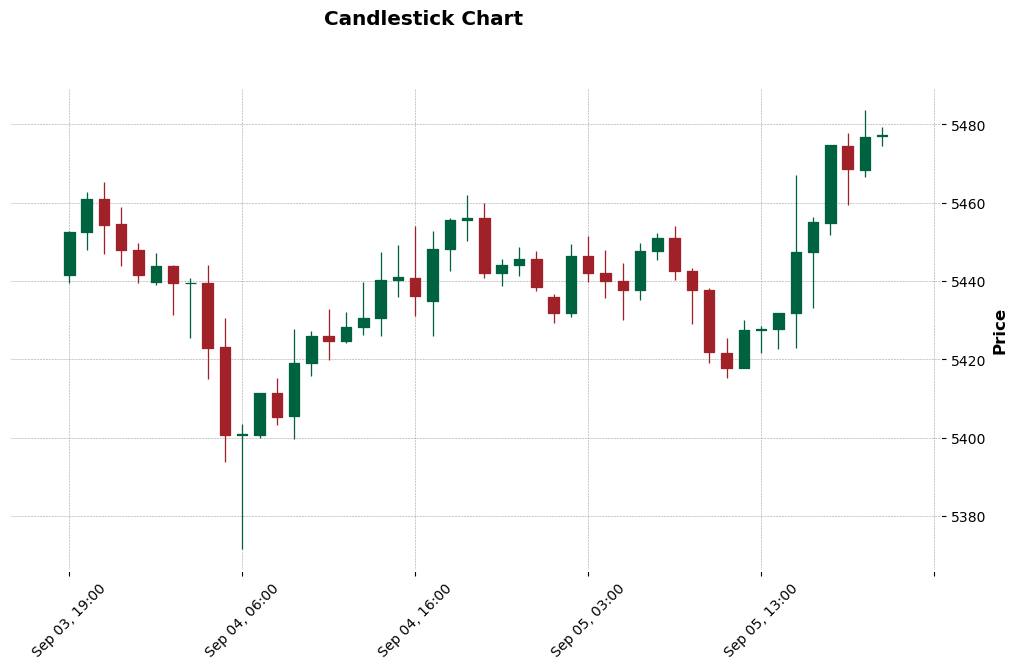

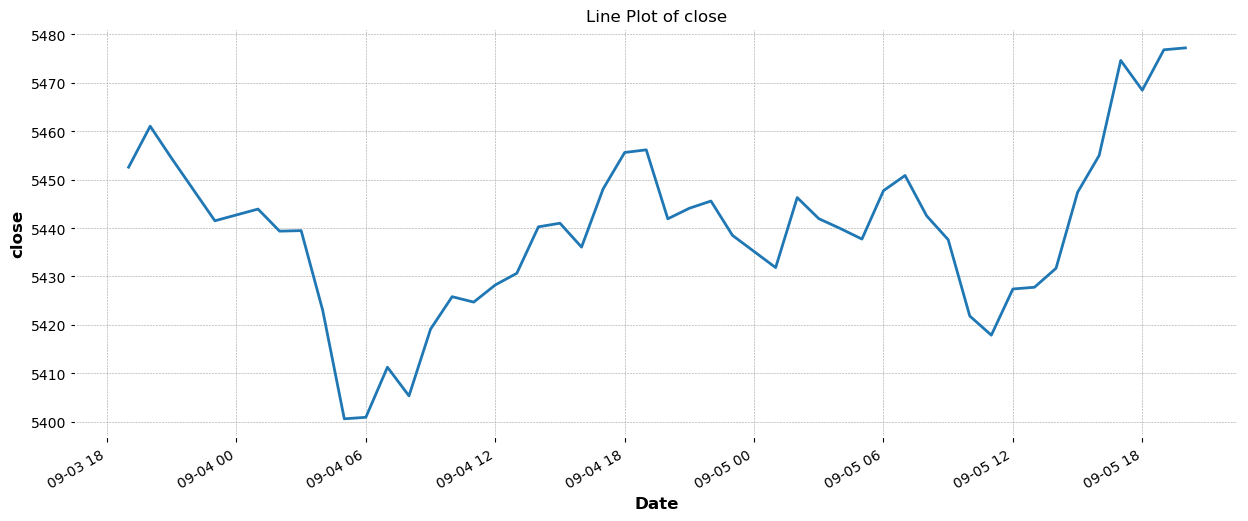

DATASET SUMMARY
Total Rows: 48
Total Columns: 140
Date Range: 2025-09-03 19:00:00 to 2025-09-05 20:00:00
Numeric Columns: ['open', 'high', 'low', 'close', 'volume', 'vol_atr_14', 'vol_atr_21', 'vol_atr_28', 'vol_bb_upper_20', 'vol_bb_middle_20', 'vol_bb_lower_20', 'vol_bb_upper_50', 'vol_bb_middle_50', 'vol_bb_lower_50', 'vol_keltner_middle', 'vol_keltner_upper', 'vol_keltner_lower', 'vol_std_dev_20', 'vol_std_dev_50', 'vol_std_dev_100', 'trend_sma_10', 'trend_sma_10_slope', 'trend_sma_20', 'trend_sma_20_slope', 'trend_sma_50', 'trend_sma_50_slope', 'trend_sma_100', 'trend_sma_100_slope', 'trend_sma_200', 'trend_sma_200_slope', 'trend_ema_10', 'trend_ema_10_slope', 'trend_ema_20', 'trend_ema_20_slope', 'trend_ema_50', 'trend_ema_50_slope', 'trend_ema_100', 'trend_ema_100_slope', 'trend_ema_200', 'trend_ema_200_slope', 'trend_macd', 'trend_macd_signal', 'trend_macd_hist', 'trend_adx', 'trend_plus_di', 'trend_minus_di', 'trend_parabolic_sar', 'momen_rsi_14', 'momen_rsi_14_trend', 'momen_

In [23]:
quick_look = ForexQuickLook(data = n_data, periods = 48,  full_look = True)

In [24]:
# def plot_signals(
#     data: pd.DataFrame,
#     periods: int = 2400,
#     cols: List[str] = None 
# ):
    
#     if cols is None:
#         cols = data.drop(columns = 'close').columns
        
#     df = data.tail(periods)
        
#     for col in cols:    
        
#         plt.figure(figsize=(15, 8))

#         colors = ['blue' if x == 0 else 'red' if x == 1 else 'green' for x in df[col]]

#         for i in range(len(df) - 1):
#             plt.plot(df.index[i:i+2], df['close'].iloc[i:i+2], 
#                     color=colors[i], linewidth=2)

#         for color, value in [ ('red', 1), ('green', 2)]:
#             mask = df[col] == value
#             if mask.any():
#                 plt.scatter(df.index[mask], df['close'][mask], 
#                         color=color, s=400, label=f'Cross = {value}')
                
#         plt.title(col,fontsize=20)
#         plt.xlabel('DateTime', fontsize=12)
#         plt.ylabel('Close', fontsize=12)
#         plt.legend()
#         plt.grid(True, alpha=0.3)
#         plt.tight_layout()
#         plt.show()
    
#     plt.show()   

In [25]:
add_mas_signals = ForexMASignals(data = n_data)

EMA/SMA SIGNAL GENERATION
 Available Fuctions: 
1 golden_death_cross 
2 ema_crossover 
3 trend_hierarchy 
4 ma_bounce_signals 
5 ma_slope_signals 
6 price_extension_signals 
7 generate_all_signals


In [26]:
s_mas_data = add_mas_signals.golden_death_cross(fast_col=10,slow_col=100 )

In [27]:
s_mas_data["golden_death_cross"].value_counts()

golden_death_cross
0    32934
2      307
1      306
Name: count, dtype: int64

In [28]:
s_mas_data = add_mas_signals.generate_all_signals()

                       close  golden_death_cross  ema_crossover  \
datetime                                                          
2025-09-05 11:00:00  5417.88                   0              0   
2025-09-05 12:00:00  5427.42                   0              0   
2025-09-05 13:00:00  5427.78                   0              0   
2025-09-05 14:00:00  5431.70                   0              0   
2025-09-05 15:00:00  5447.40                   0              0   
2025-09-05 16:00:00  5455.01                   0              0   
2025-09-05 17:00:00  5474.64                   0              0   
2025-09-05 18:00:00  5468.49                   0              0   
2025-09-05 19:00:00  5476.84                   0              0   
2025-09-05 20:00:00  5477.23                   0              0   

                     bearish_bullish_hierarchy  bounce_bearish_bullish  \
datetime                                                                 
2025-09-05 11:00:00                          2 

In [29]:
plotter = ForexPlotter(data = s_mas_data)

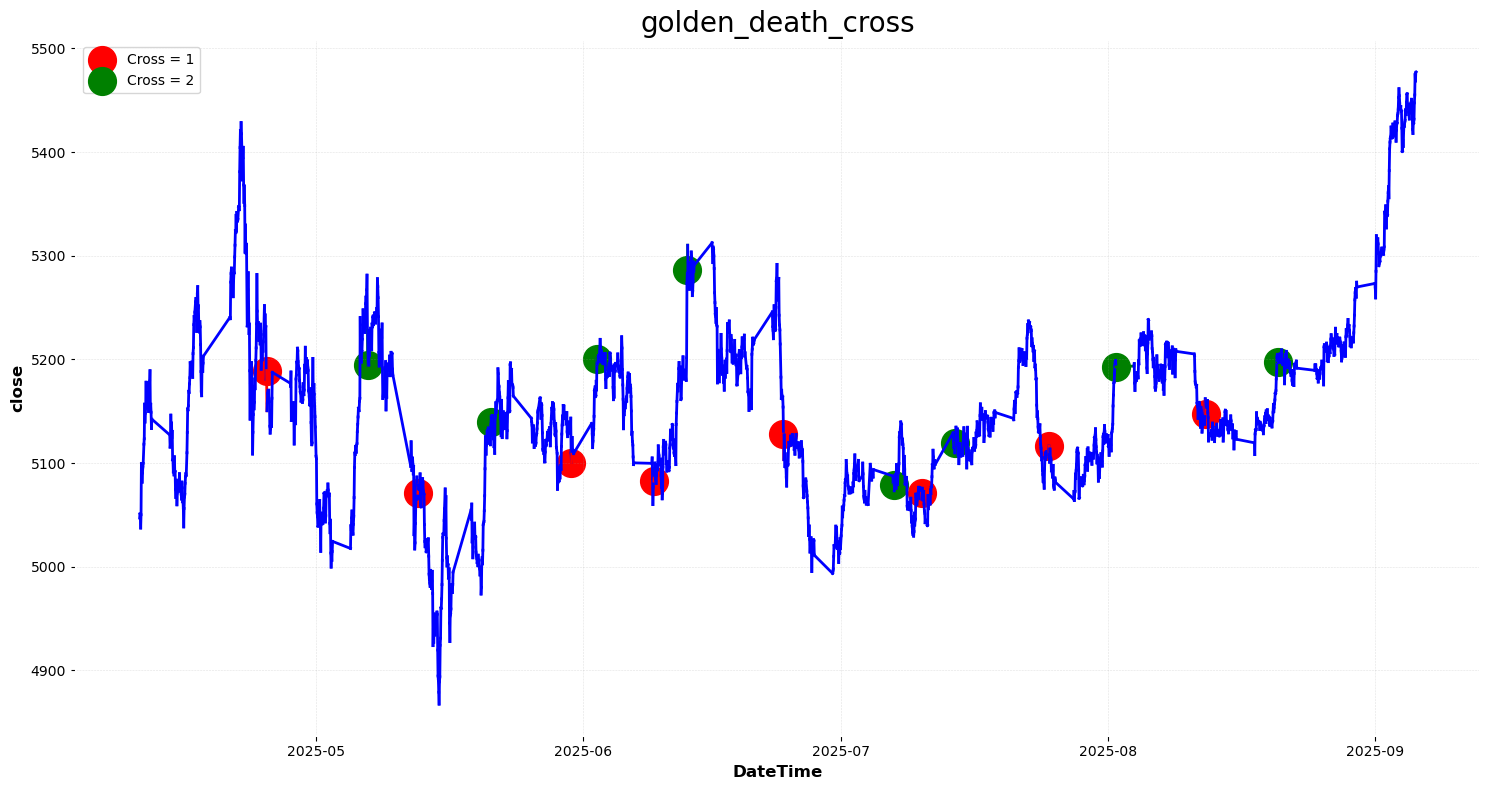

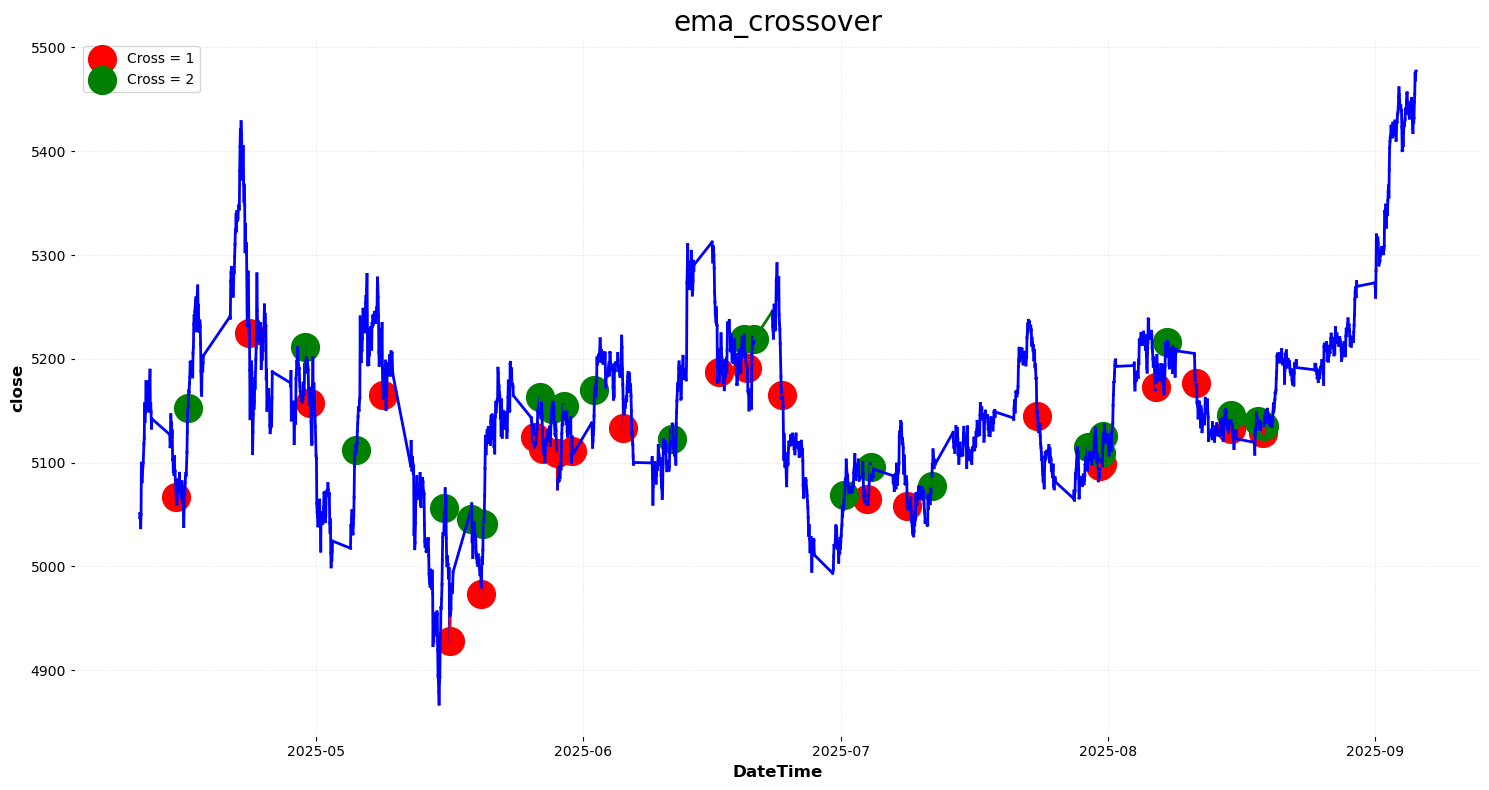

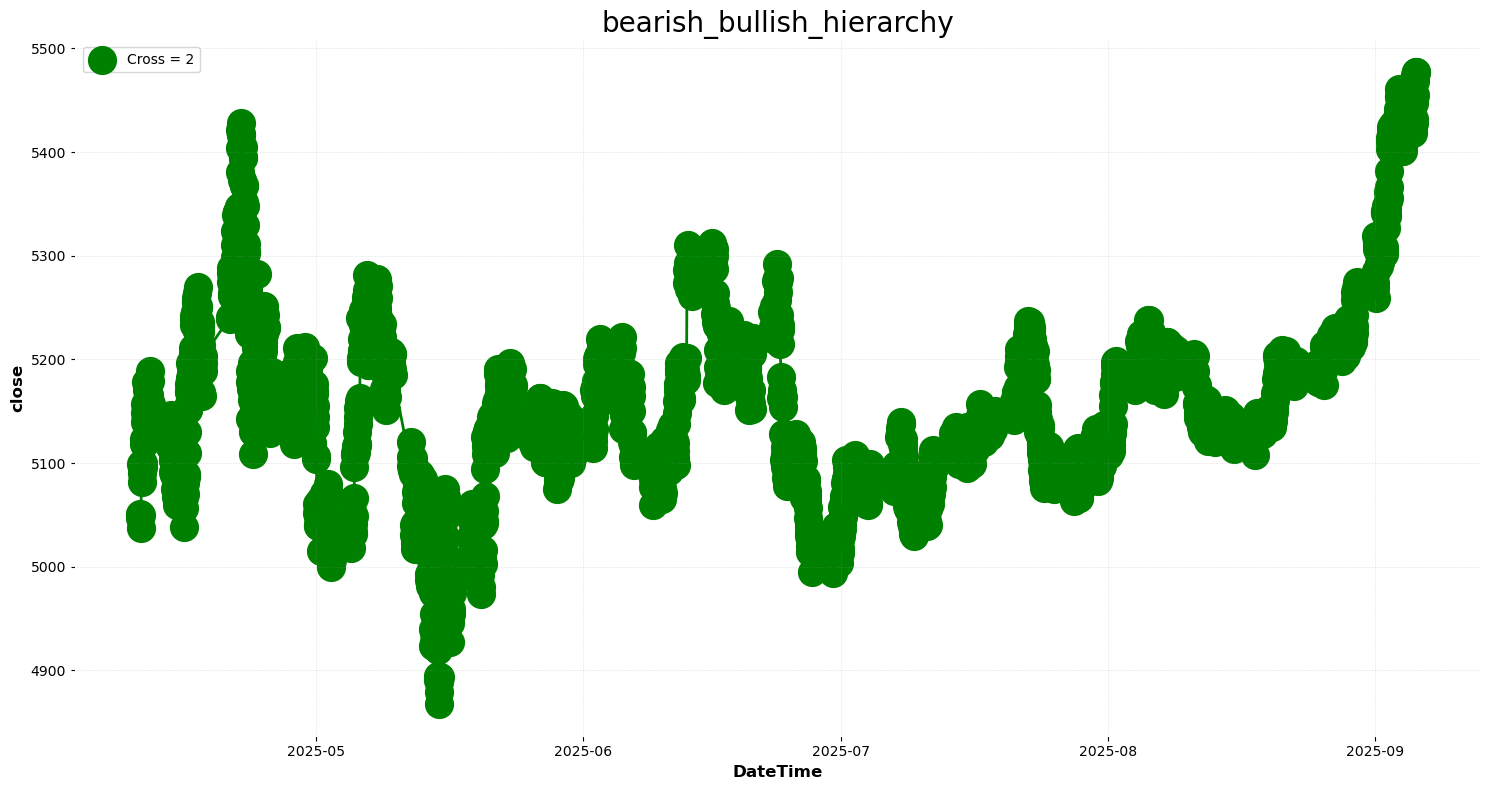

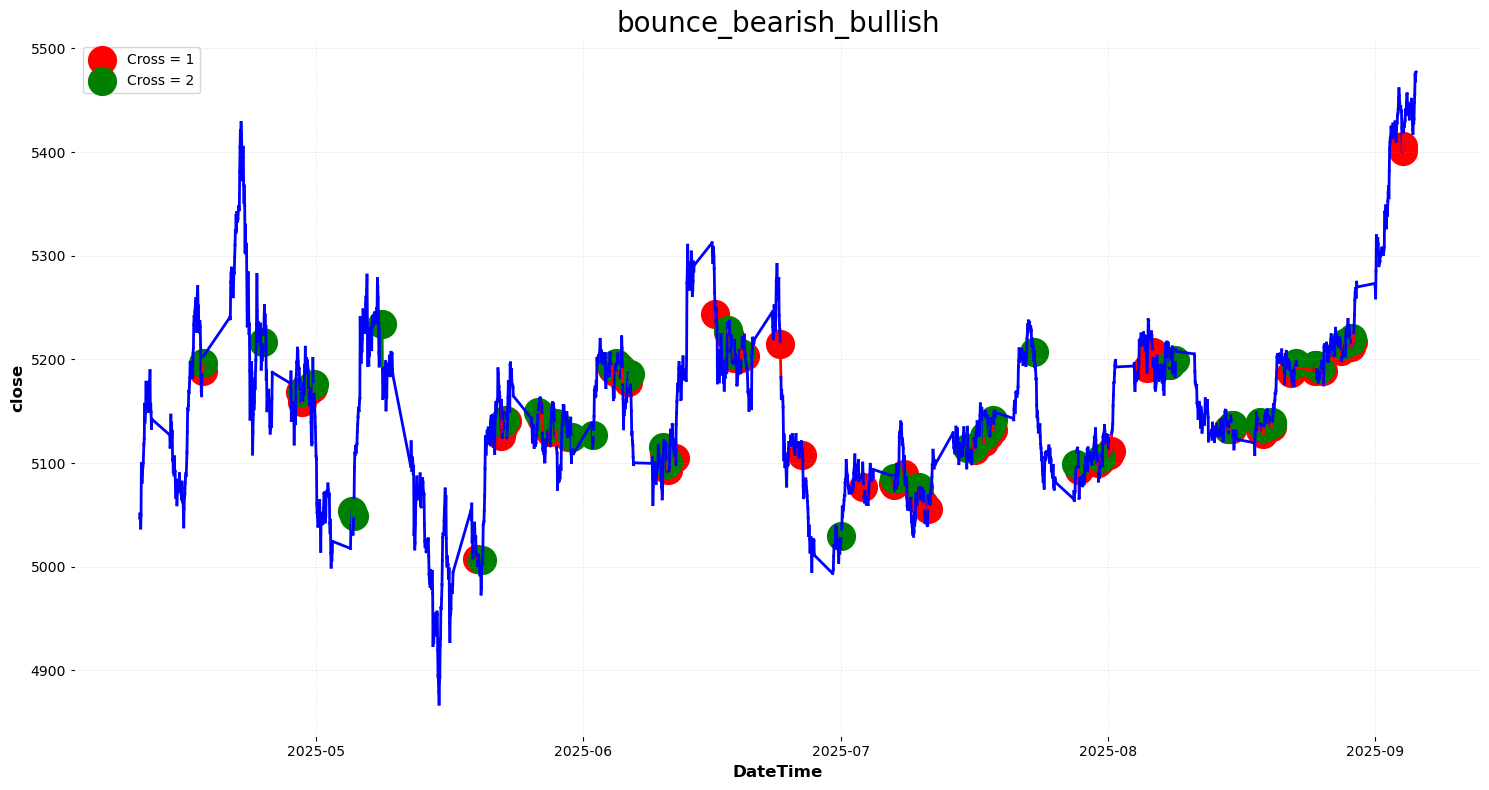

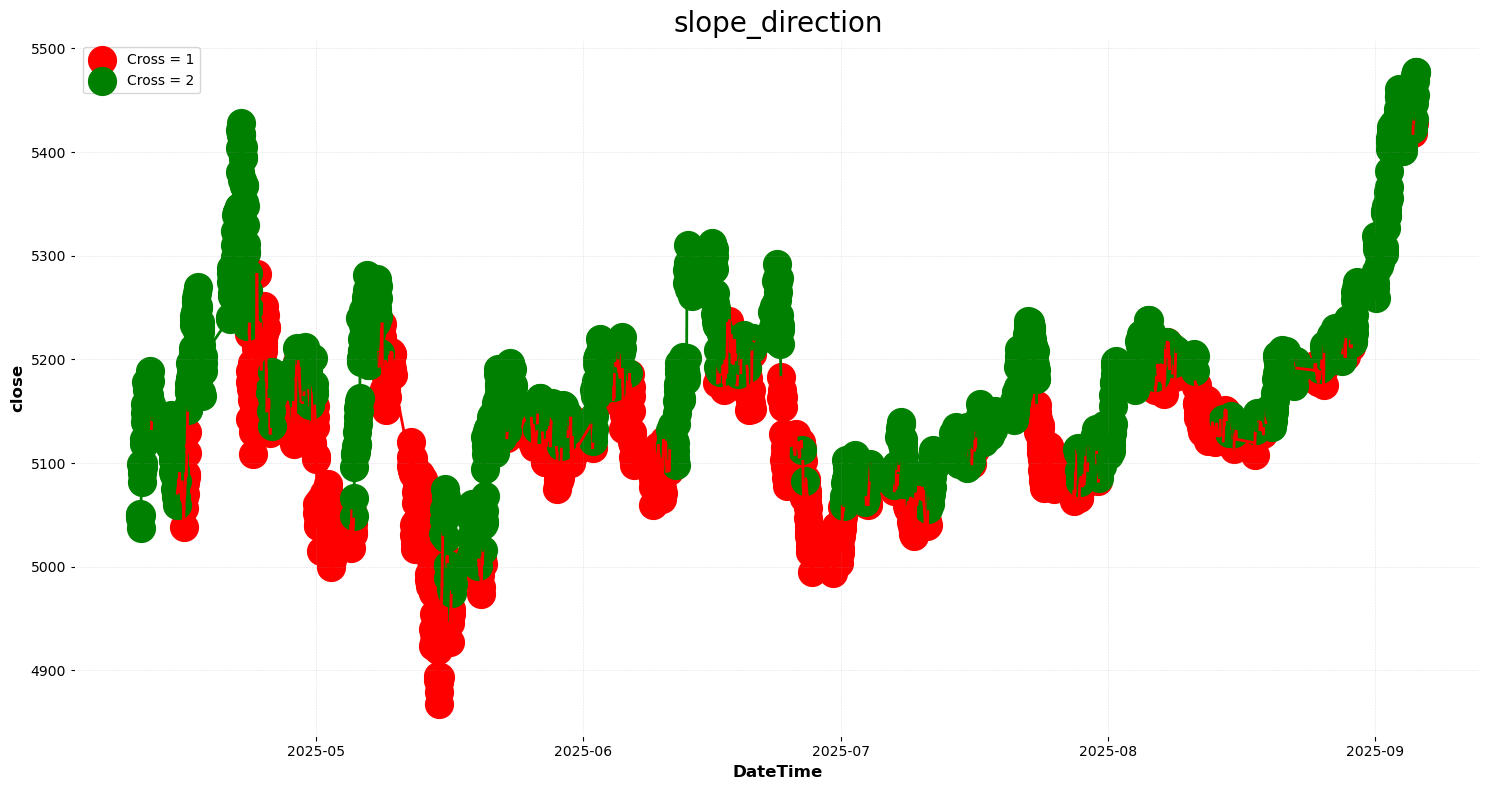

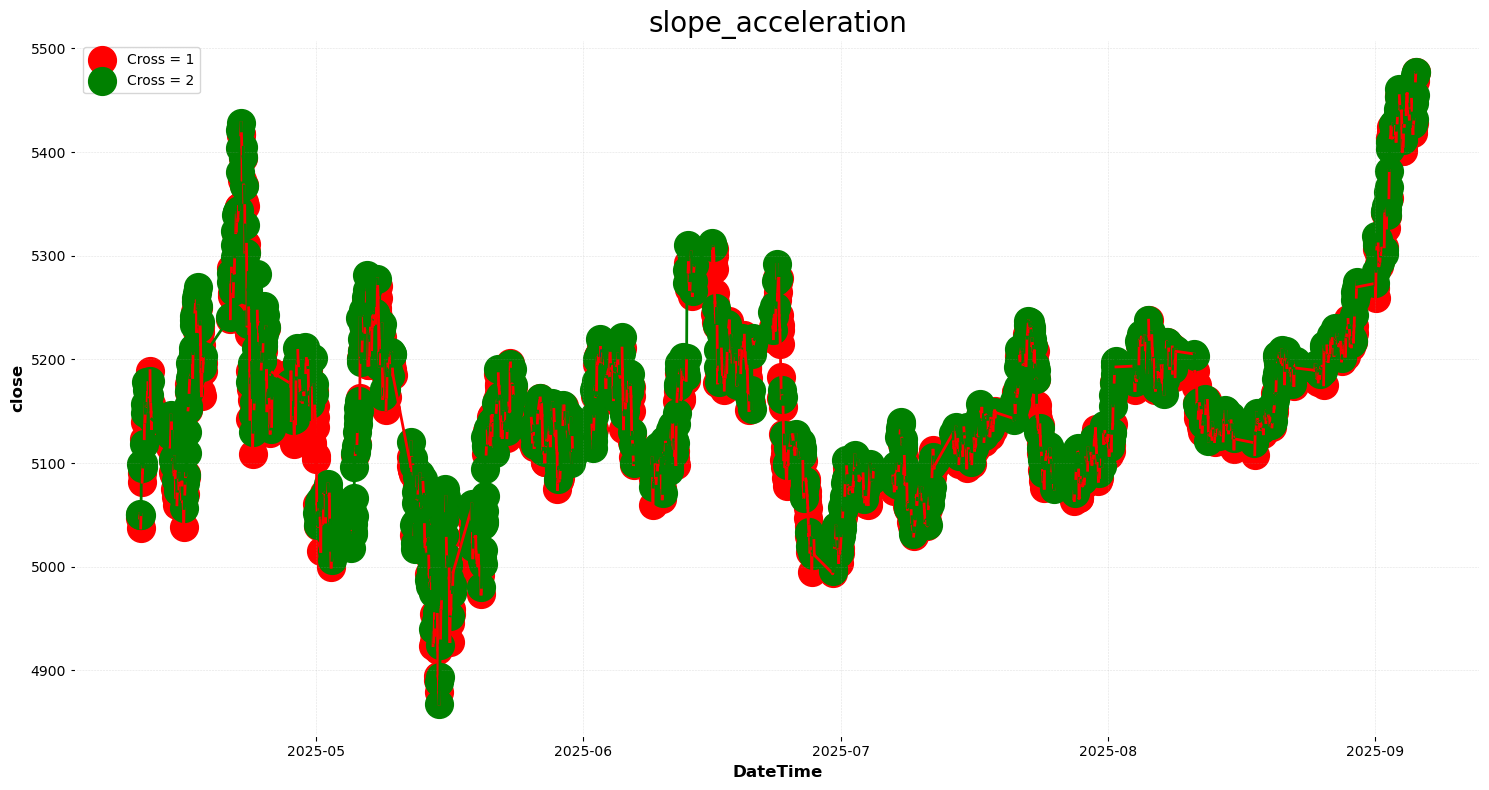

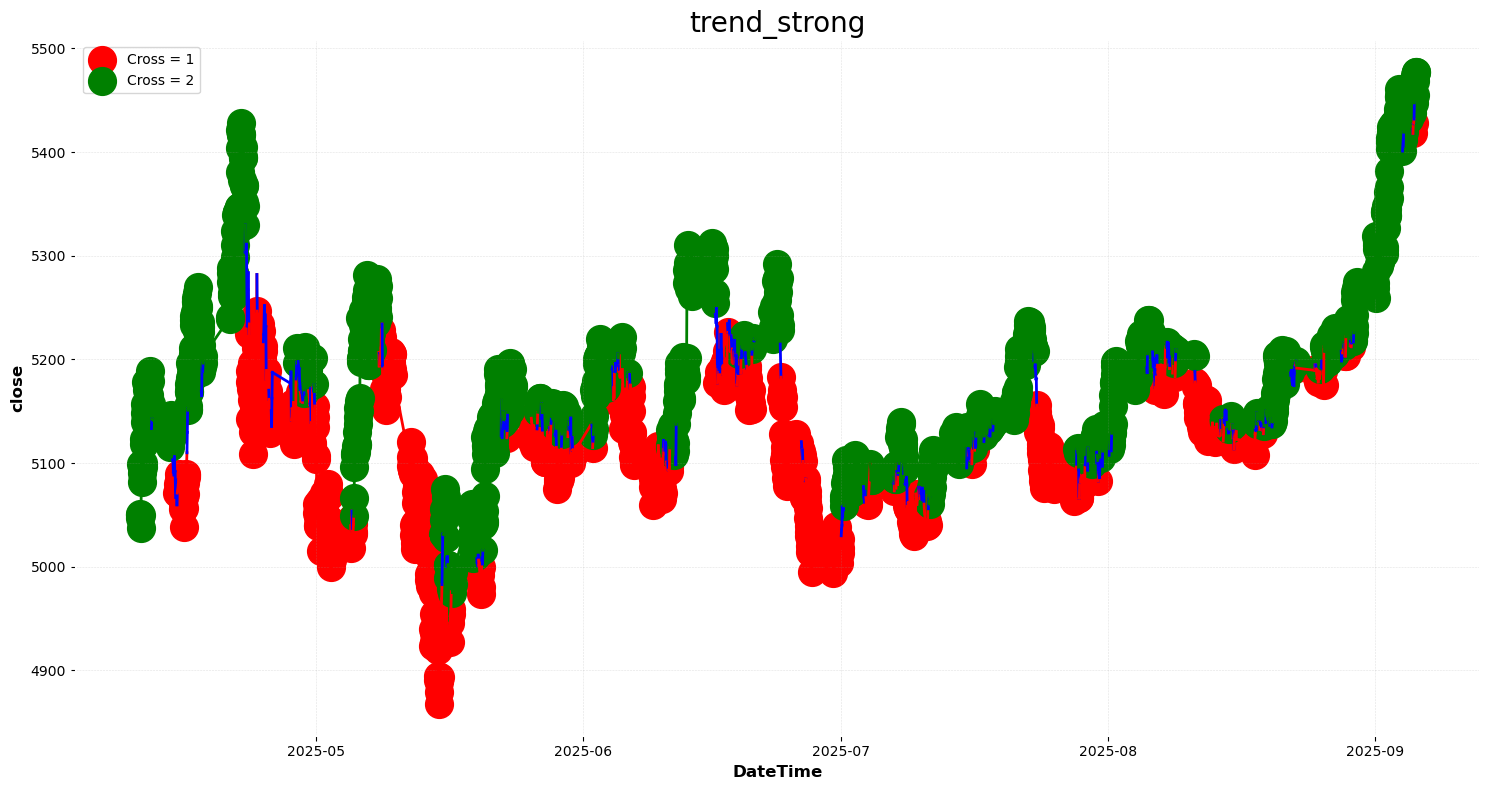

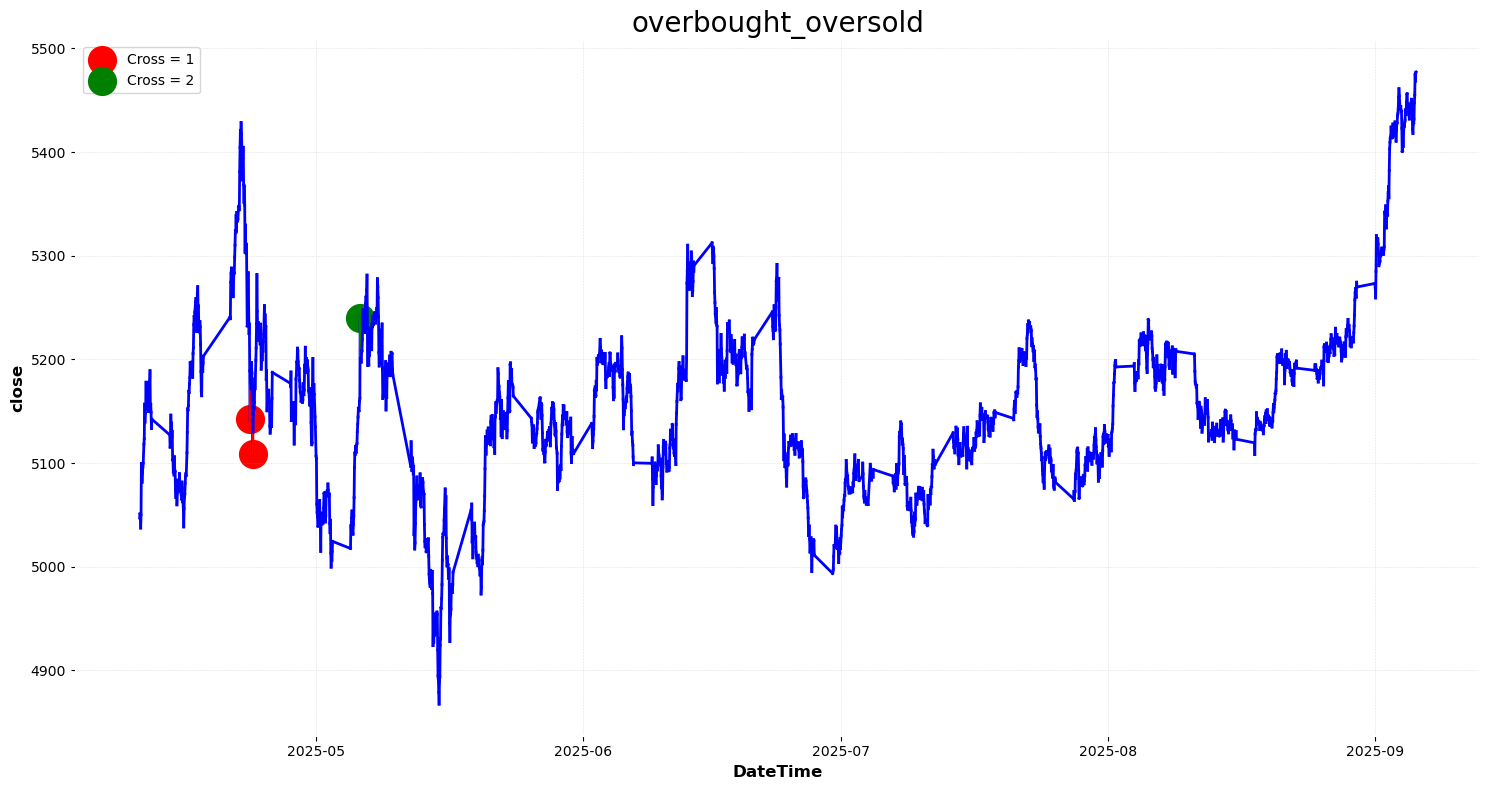

In [30]:
plotter.plot_signals()

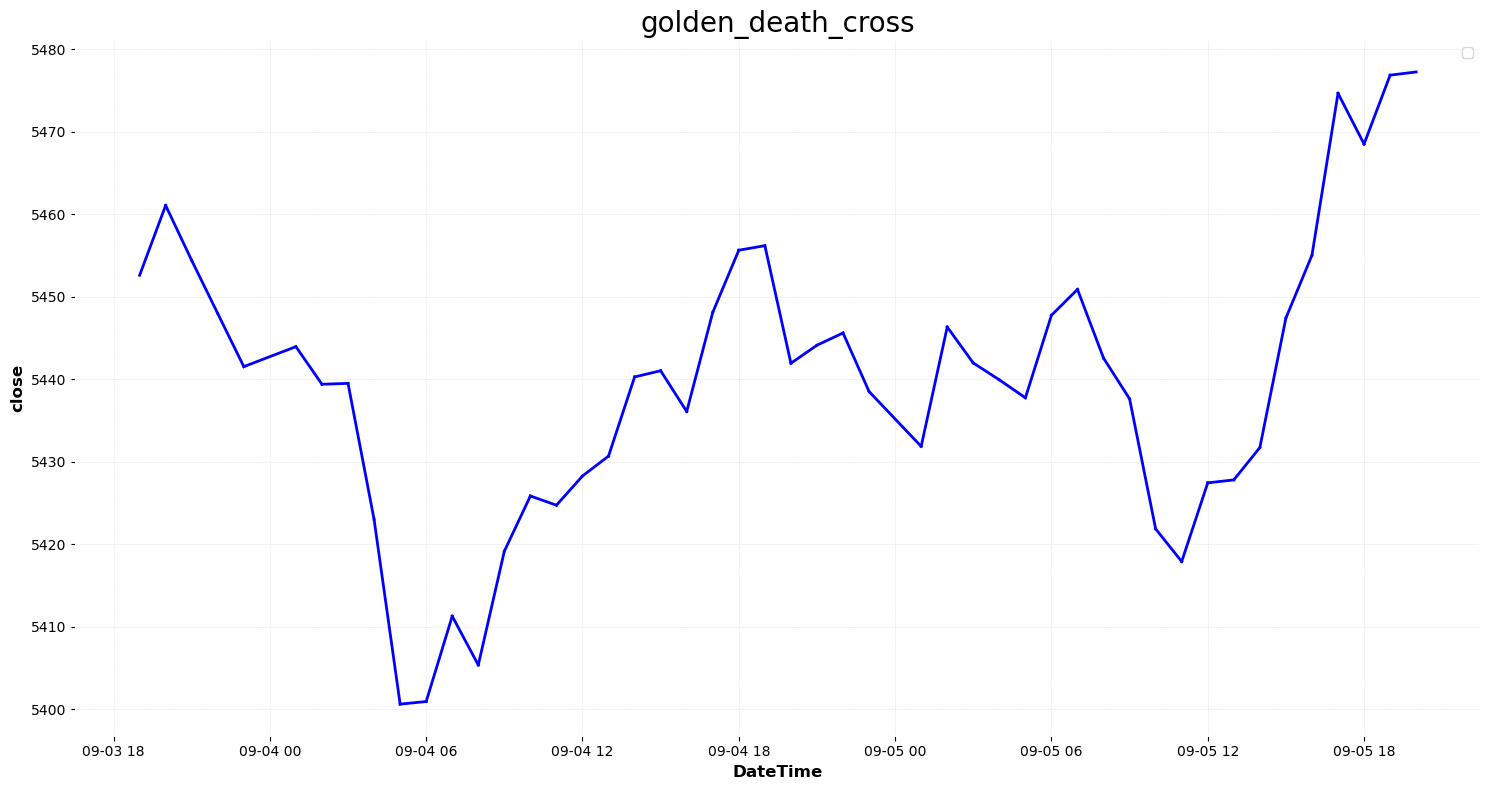

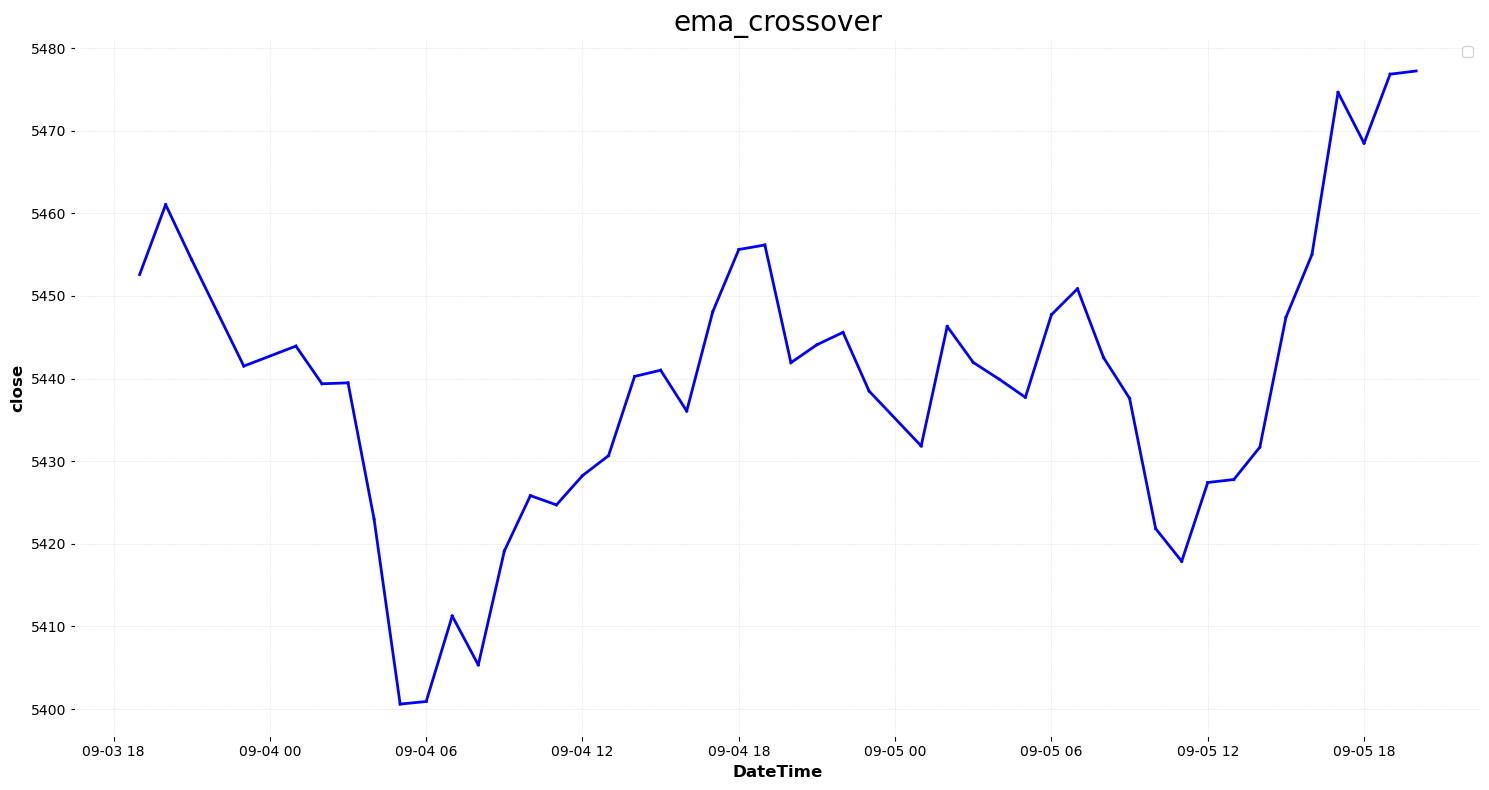

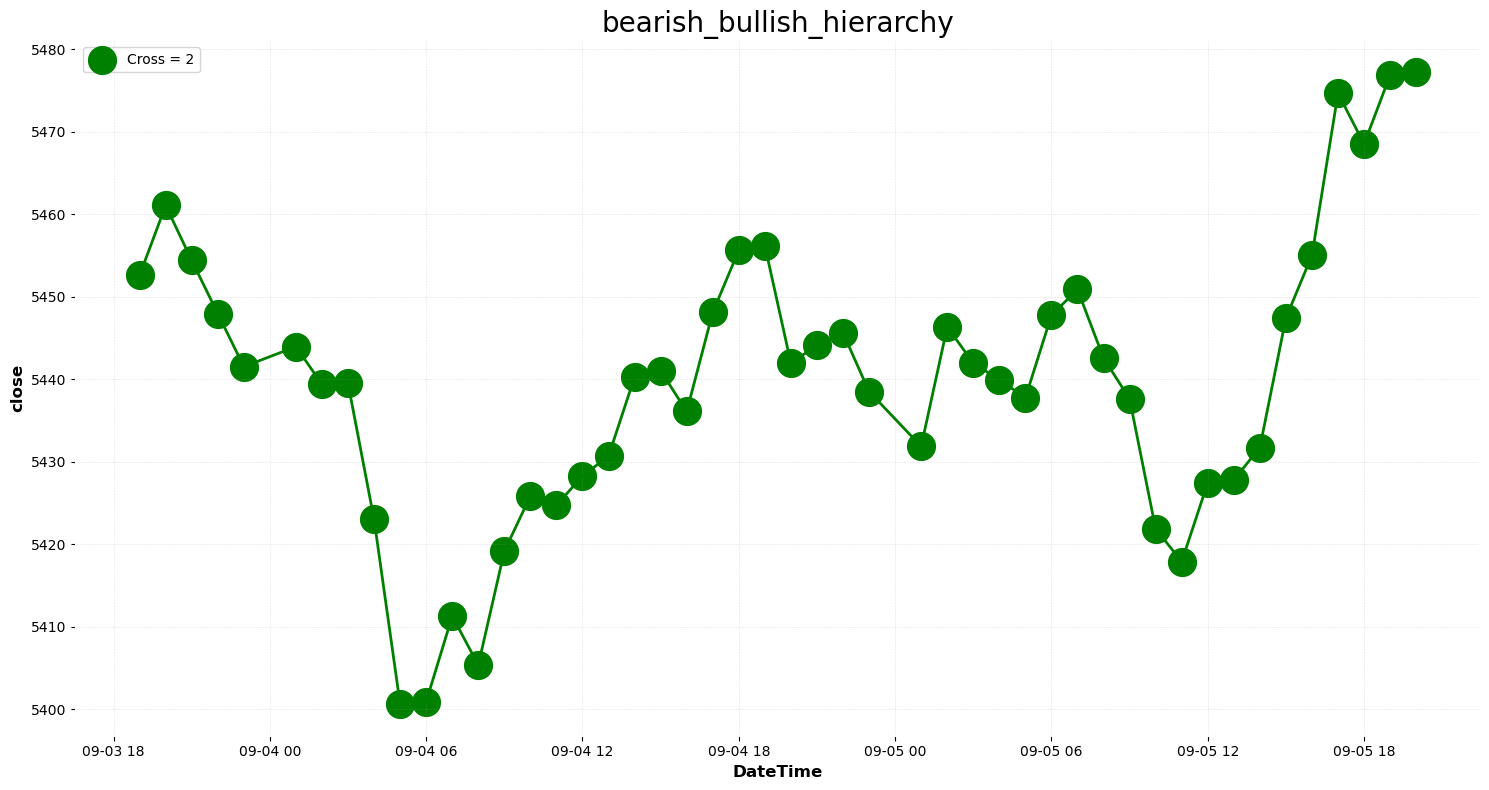

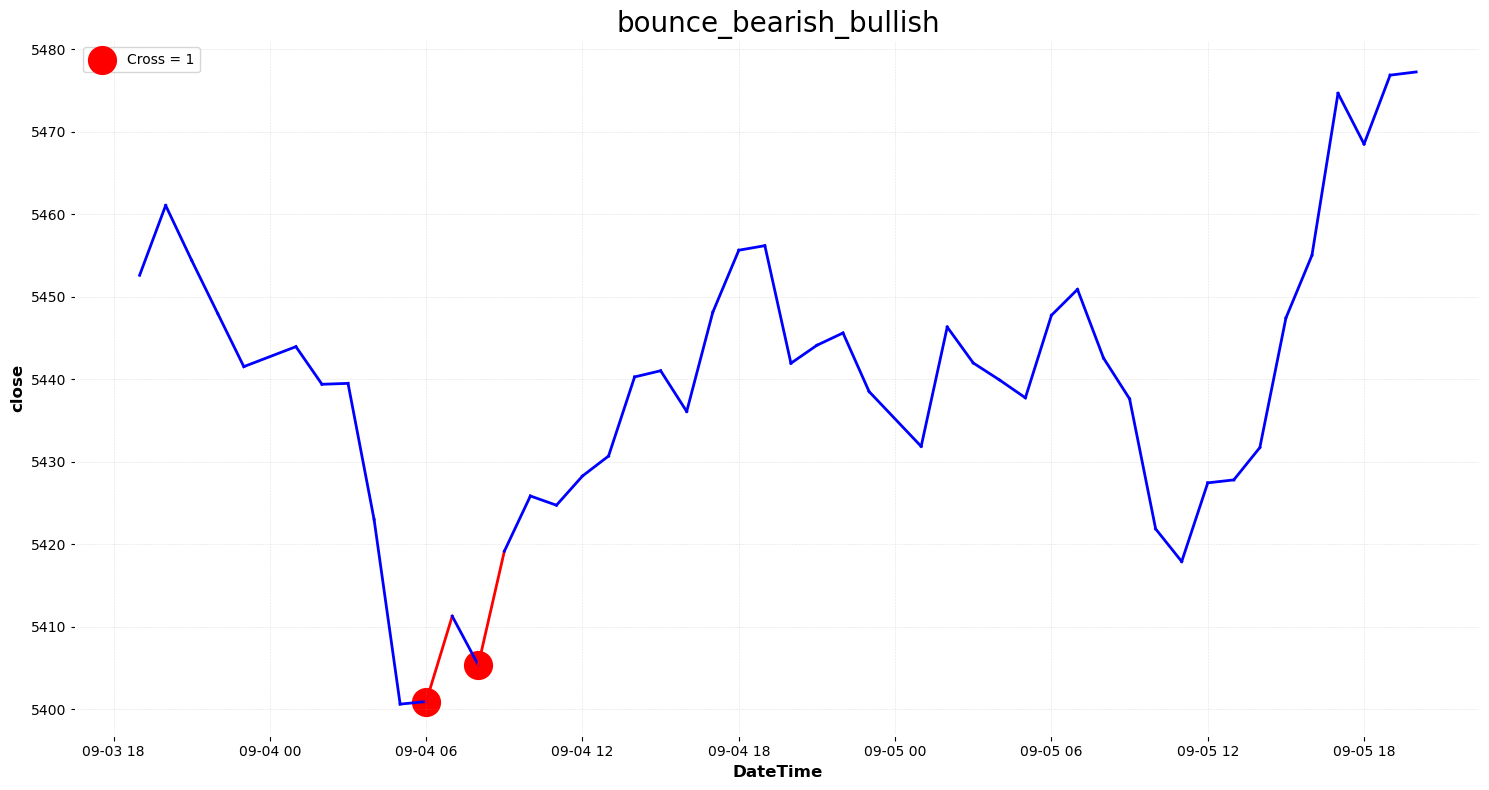

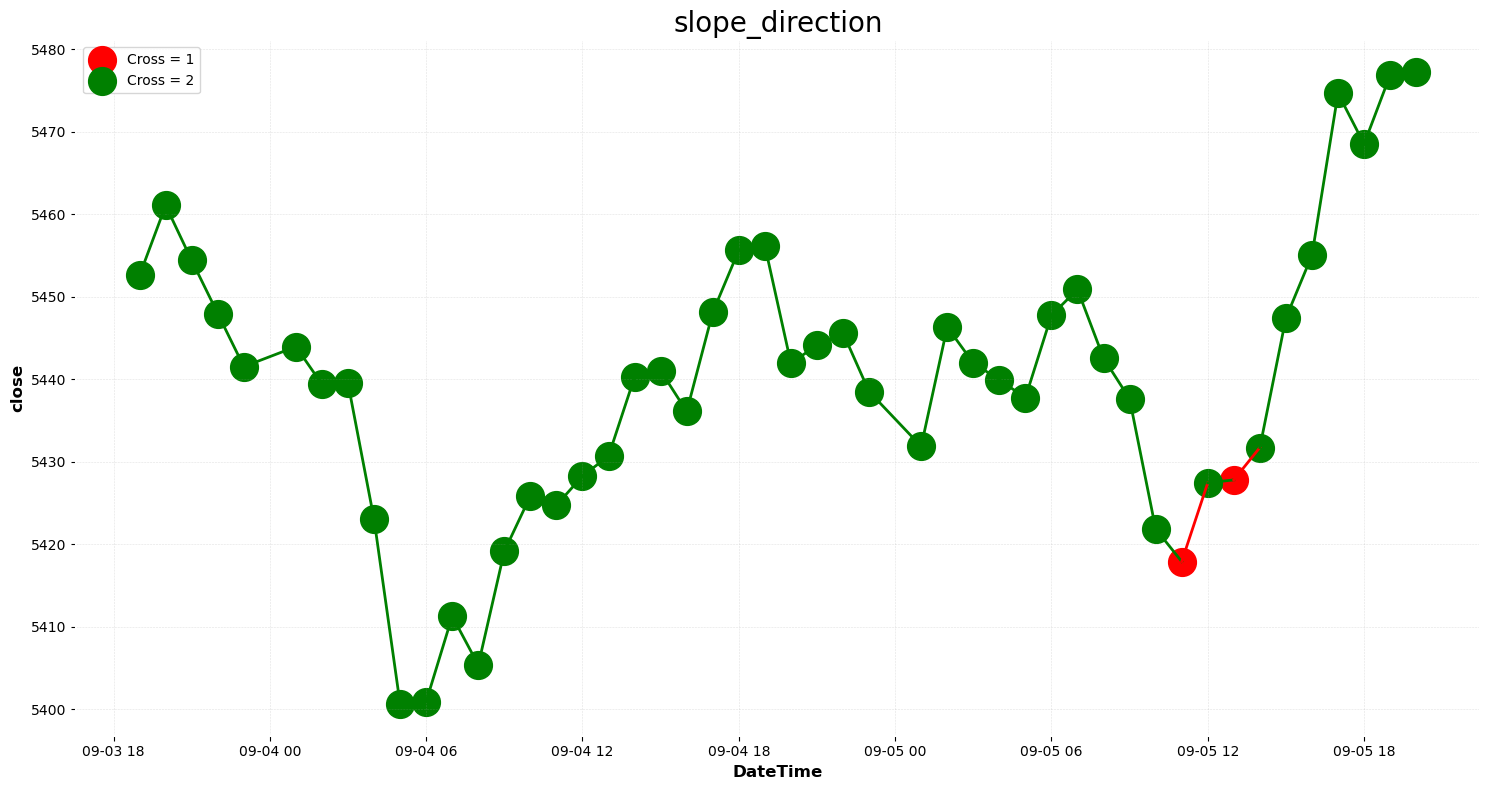

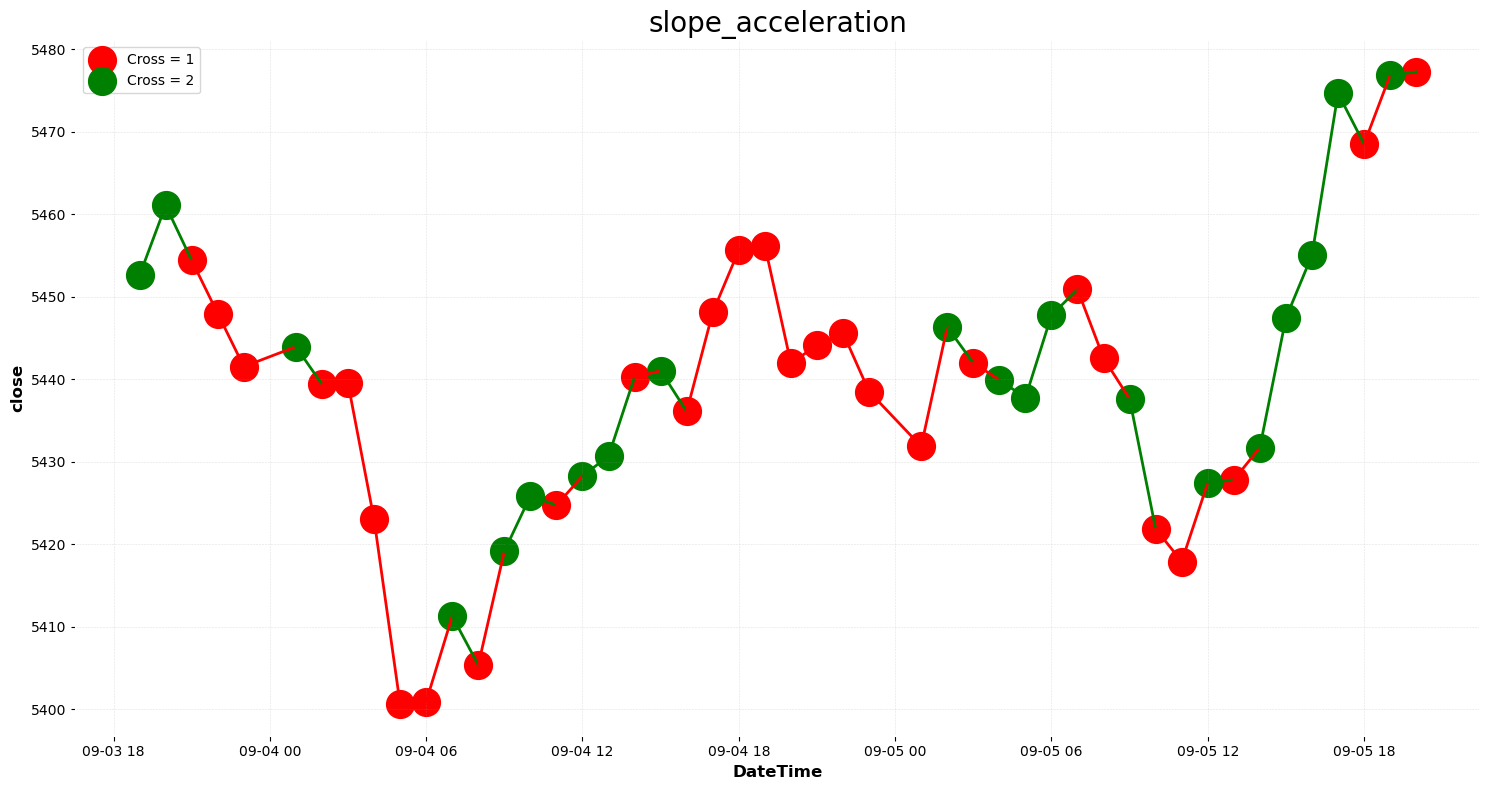

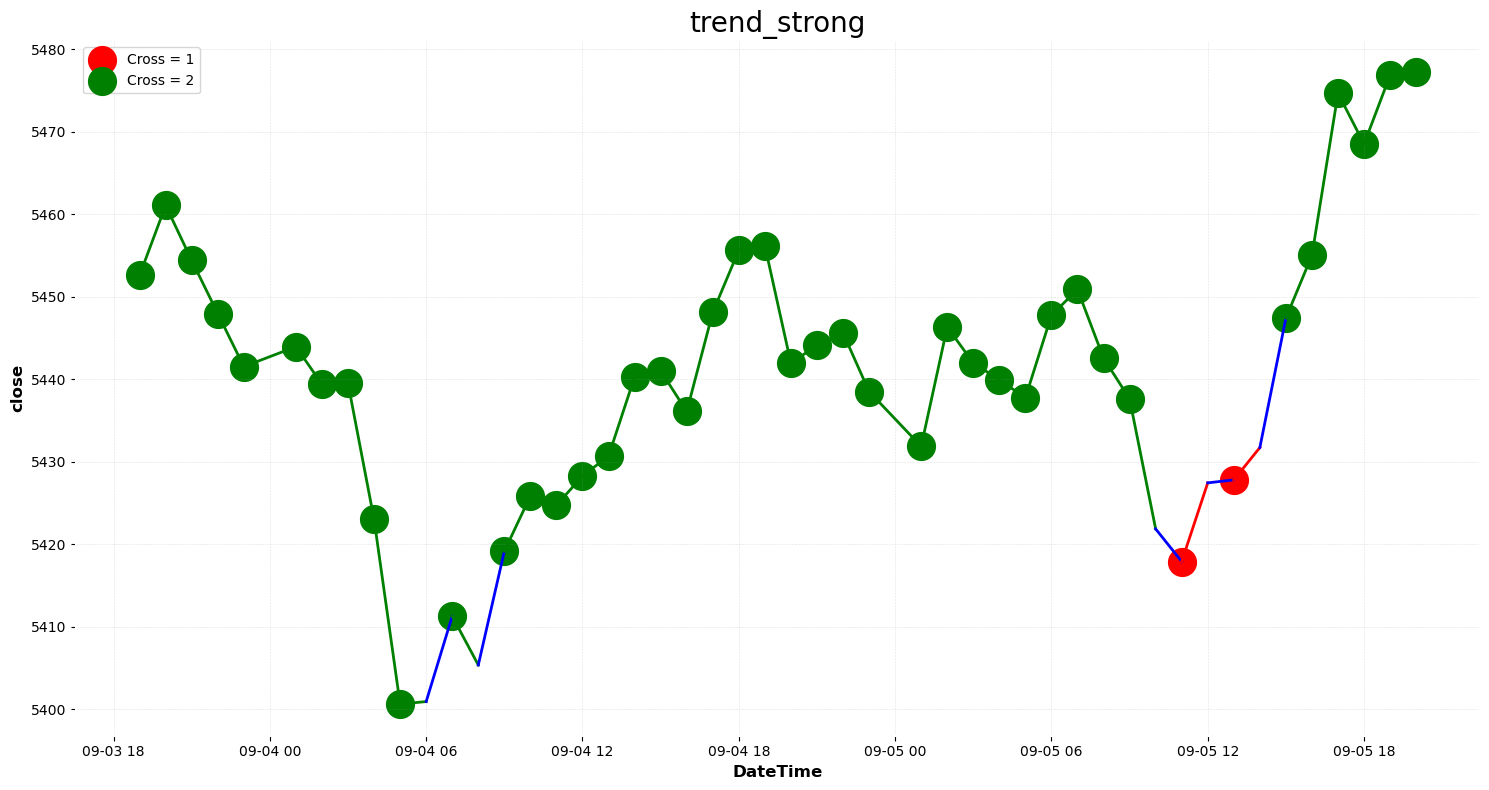

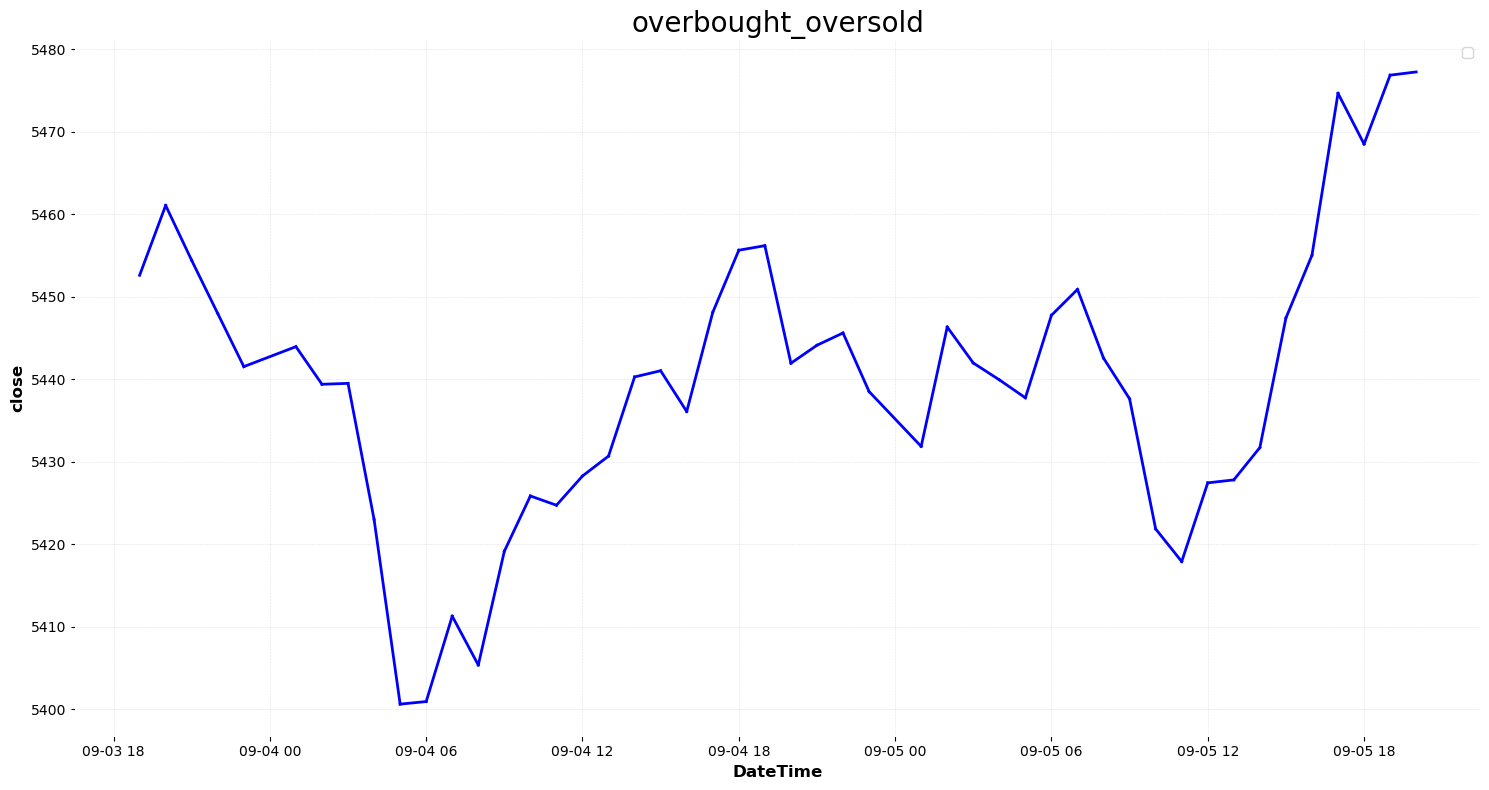

In [31]:
plotter.plot_signals(periods = 48)

In [32]:
add_macd_signals = ForexMACDSignals(data = n_data )

MACD SIGNAL GENERATION
 Available Fuctions: 
1 macd_crossover_signals 
2 macd_histogram_signals 
3 macd_zero_line_signals 
4 generate_all_macd_signals


In [33]:
s_macd_data = add_macd_signals.macd_crossover_signals()

In [34]:
s_macd_data.nunique()

close             29022
macd_crossover        3
dtype: int64

In [35]:
s_macd_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33547 entries, 2020-01-02 01:00:00 to 2025-09-05 20:00:00
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   close           33547 non-null  float64
 1   macd_crossover  33547 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 786.3 KB


In [36]:
s_macd_data['macd_crossover'].value_counts()

macd_crossover
0    30902
2     1323
1     1322
Name: count, dtype: int64

In [37]:
s_macd_data.tail(10)

,close,macd_crossover
datetime,,
2025-09-05 11:00:00,5417.88,0
2025-09-05 12:00:00,5427.42,0
2025-09-05 13:00:00,5427.78,0
2025-09-05 14:00:00,5431.70,0
2025-09-05 15:00:00,5447.40,0
2025-09-05 16:00:00,5455.01,2
2025-09-05 17:00:00,5474.64,0
2025-09-05 18:00:00,5468.49,0
2025-09-05 19:00:00,5476.84,0


Macd crossover looks better than golden death crossover

In [38]:
s_macd_data = add_macd_signals.generate_all_macd_signals()

                       close  macd_crossover  macd_histogram_direction  \
datetime                                                                 
2025-09-05 11:00:00  5417.88               0                         1   
2025-09-05 12:00:00  5427.42               0                         1   
2025-09-05 13:00:00  5427.78               0                         1   
2025-09-05 14:00:00  5431.70               0                         1   
2025-09-05 15:00:00  5447.40               0                         1   
2025-09-05 16:00:00  5455.01               2                         2   
2025-09-05 17:00:00  5474.64               0                         2   
2025-09-05 18:00:00  5468.49               0                         2   
2025-09-05 19:00:00  5476.84               0                         2   
2025-09-05 20:00:00  5477.23               0                         2   

                     macd_histogram_momentum  macd_zero_cross  
datetime                                       

In [39]:
plotter = ForexPlotter(data = s_macd_data)

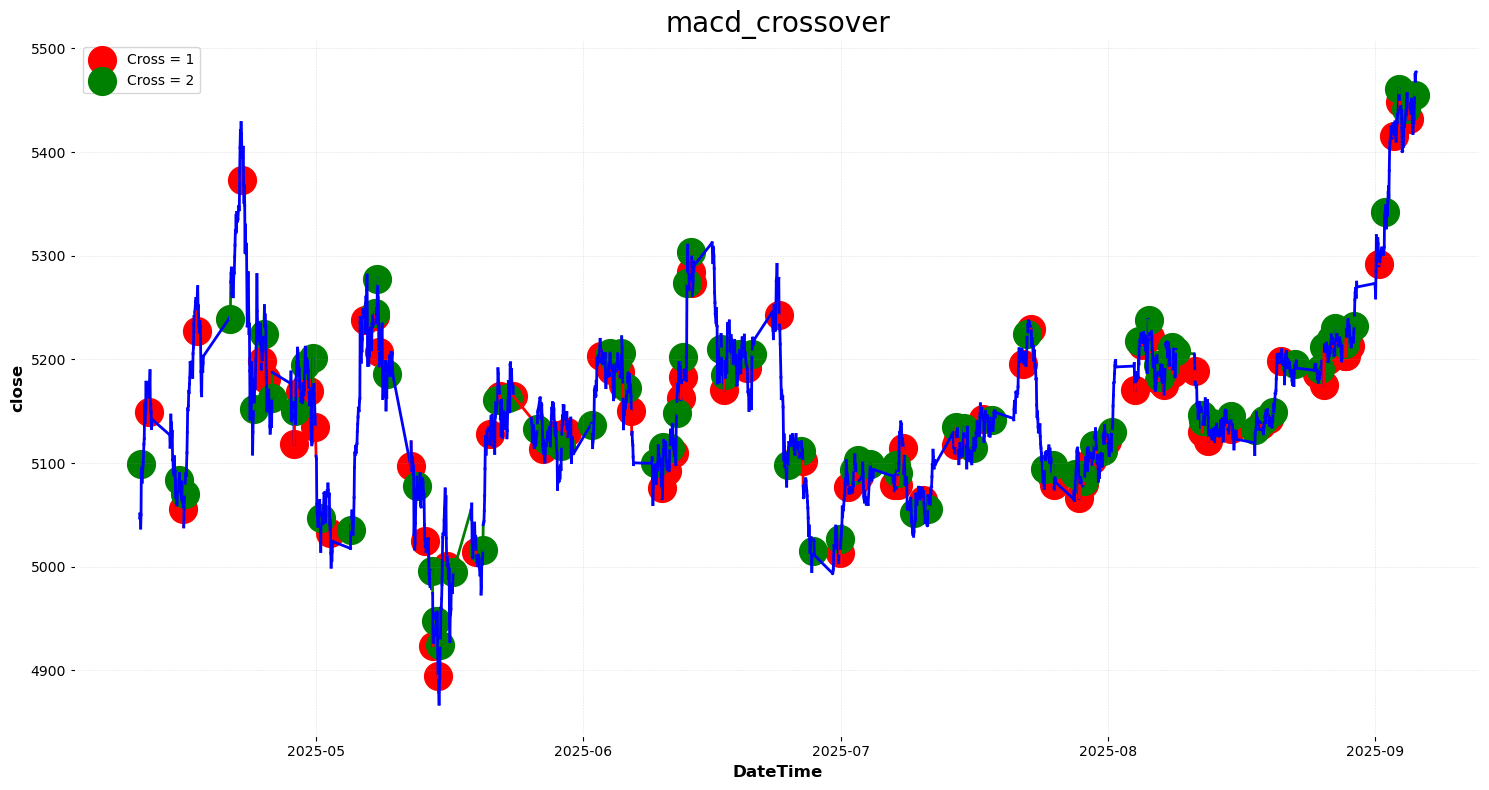

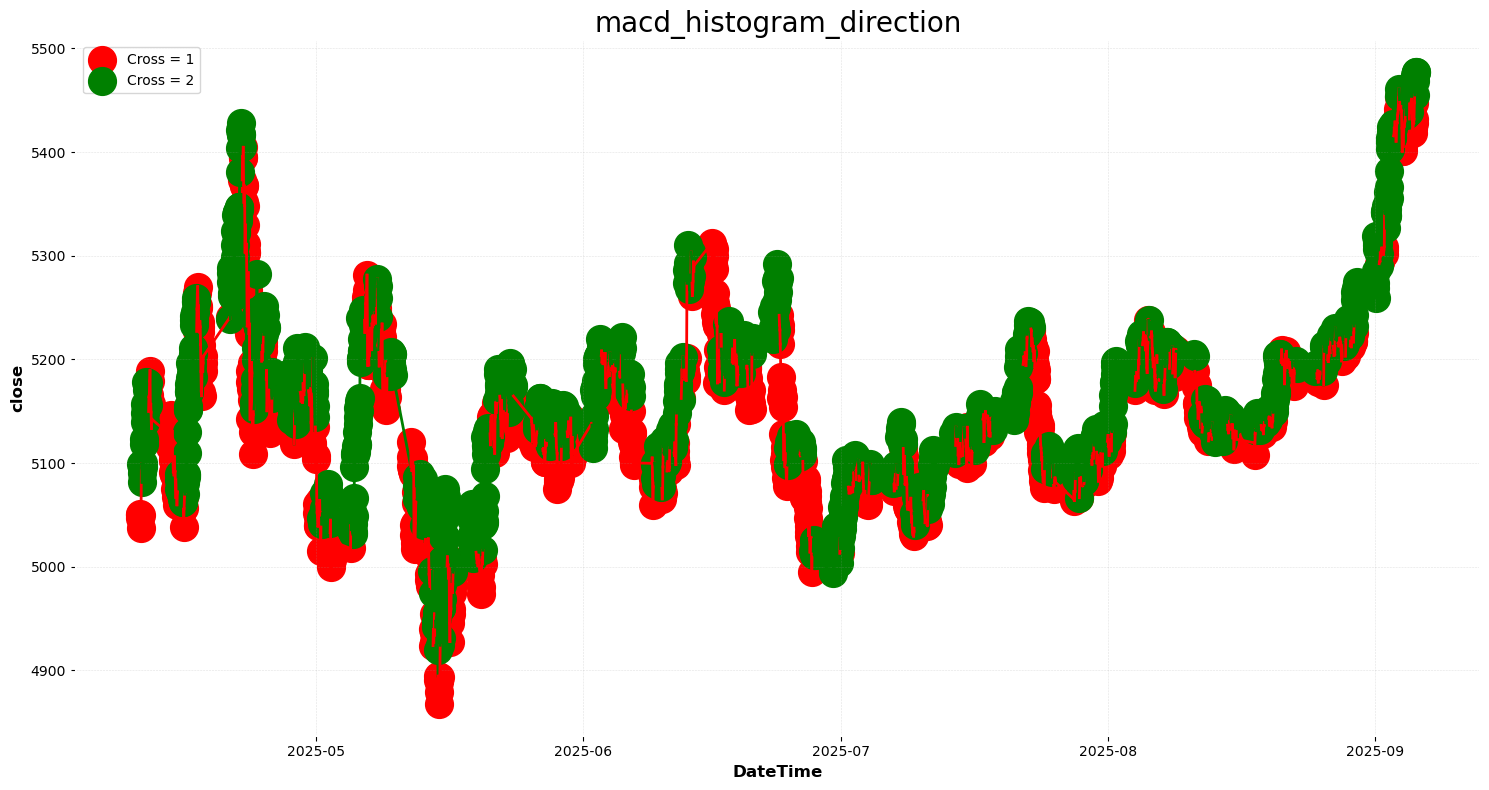

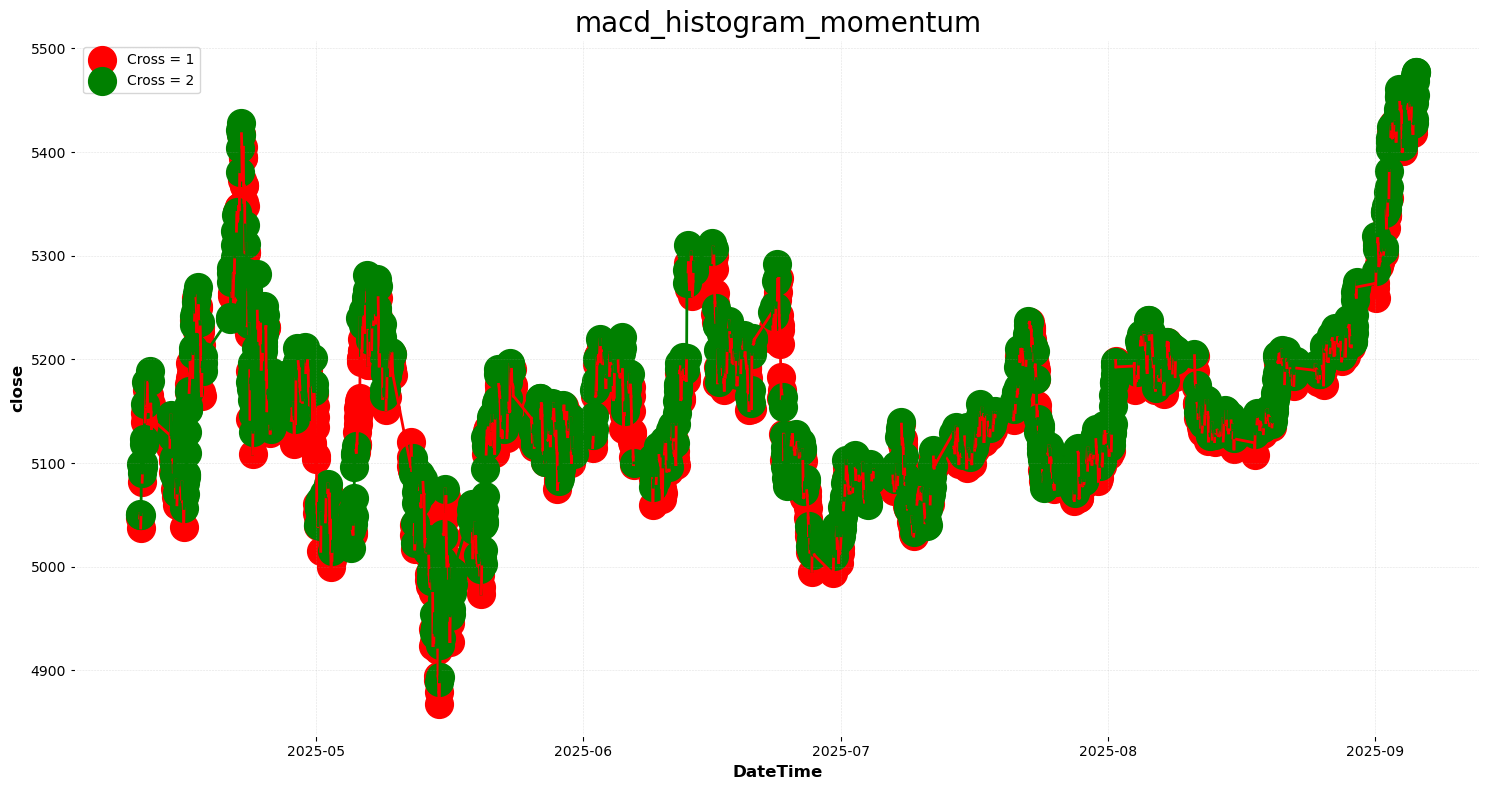

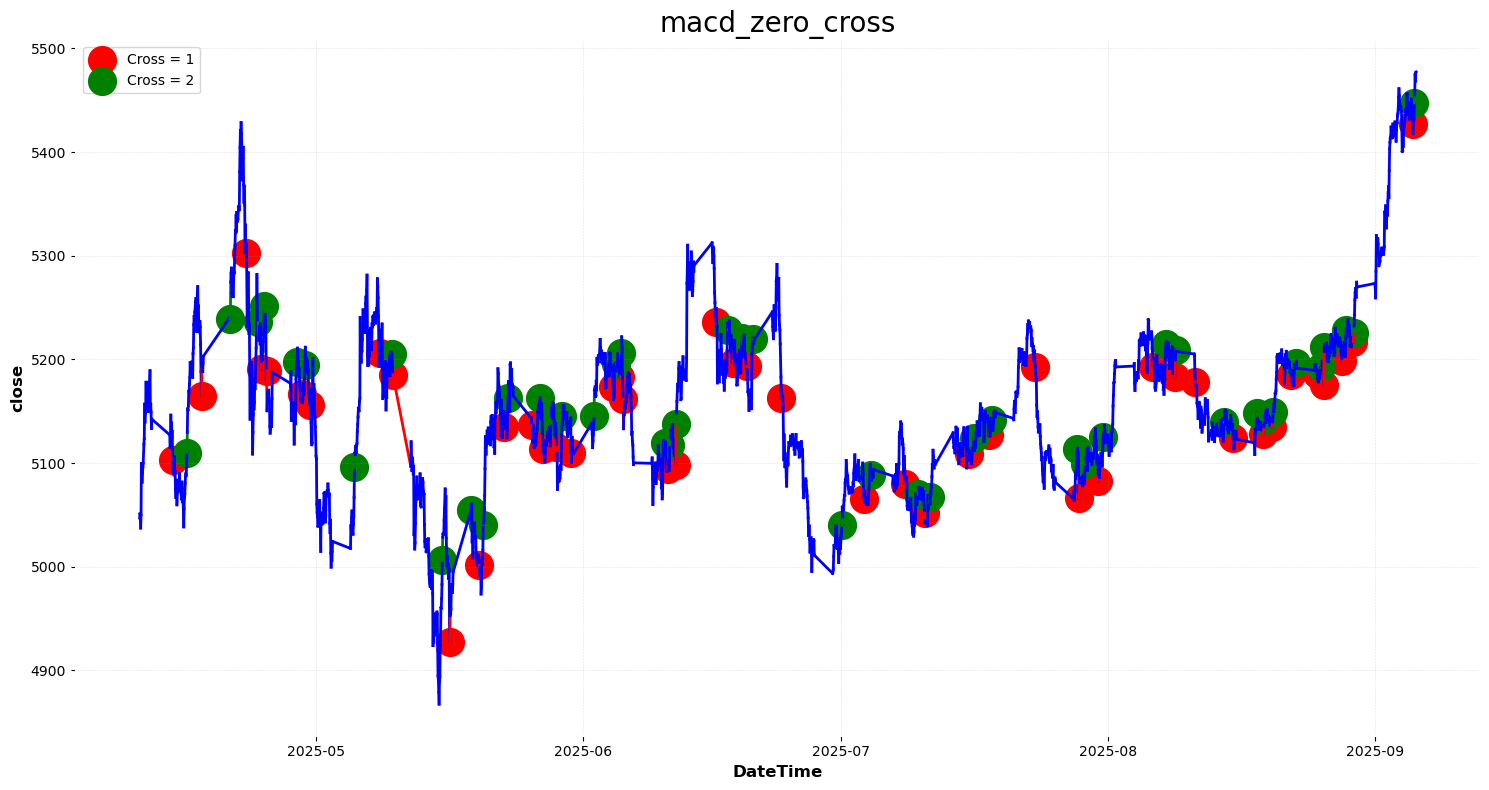

In [40]:
plotter.plot_signals()

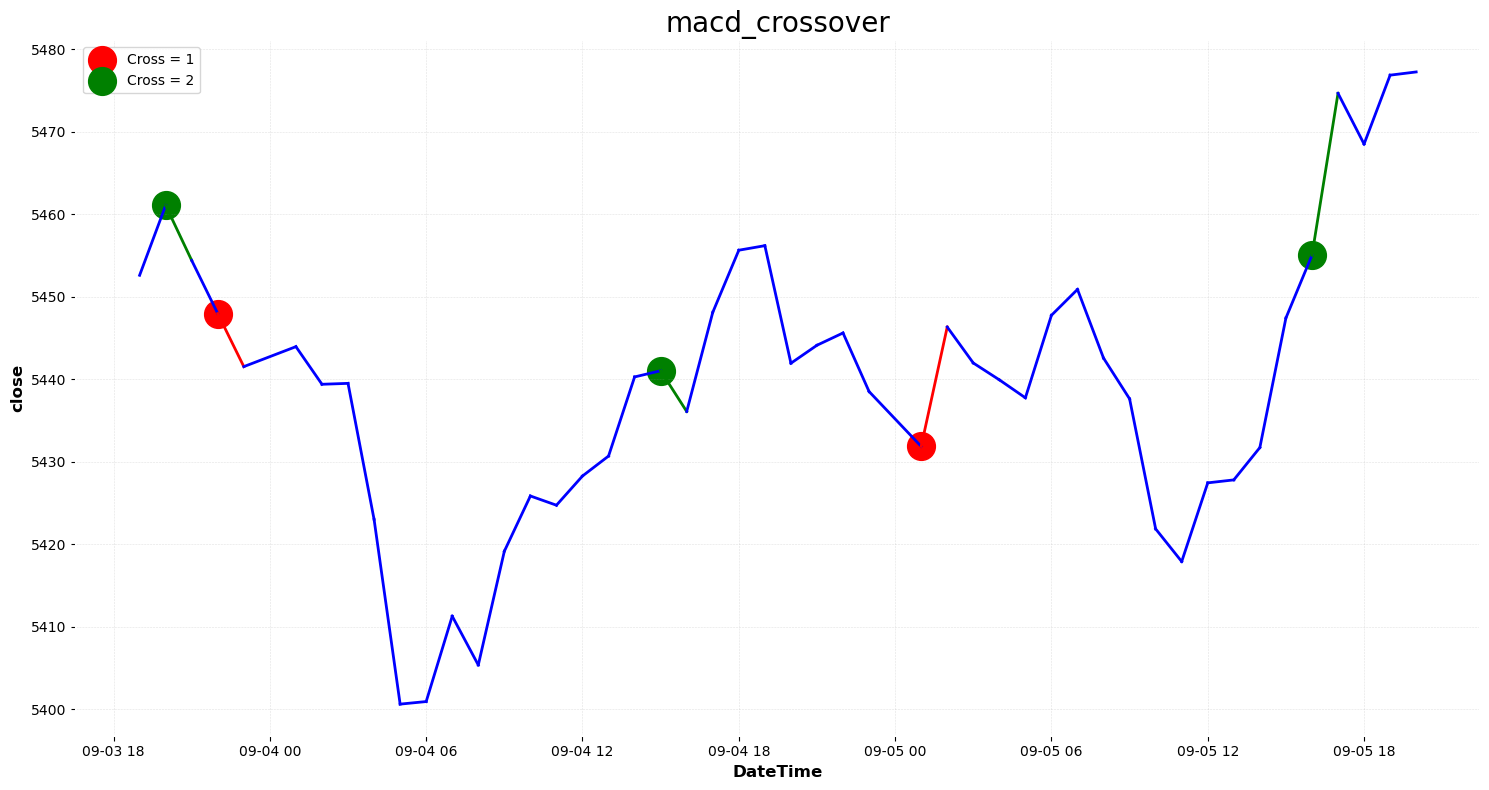

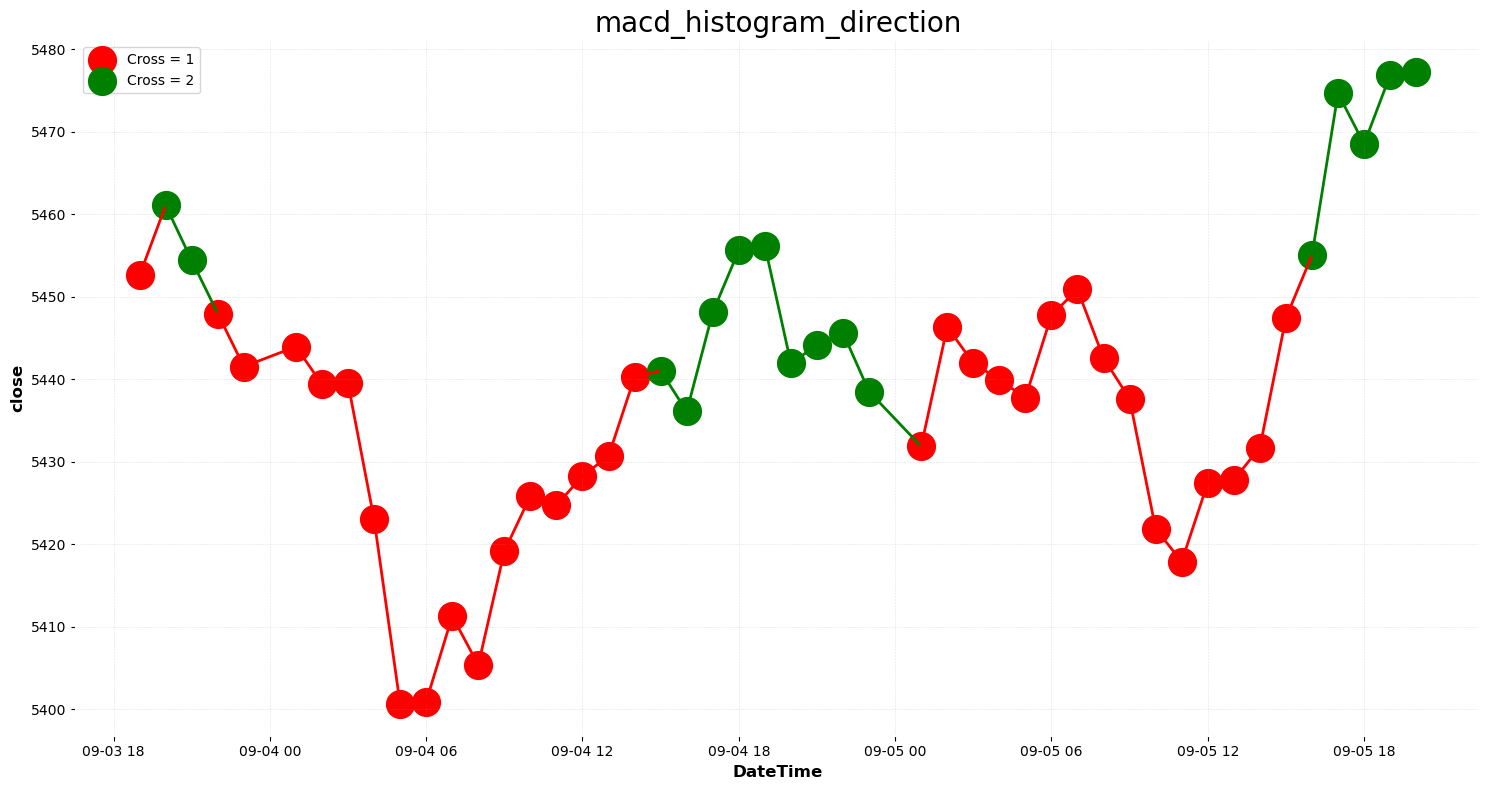

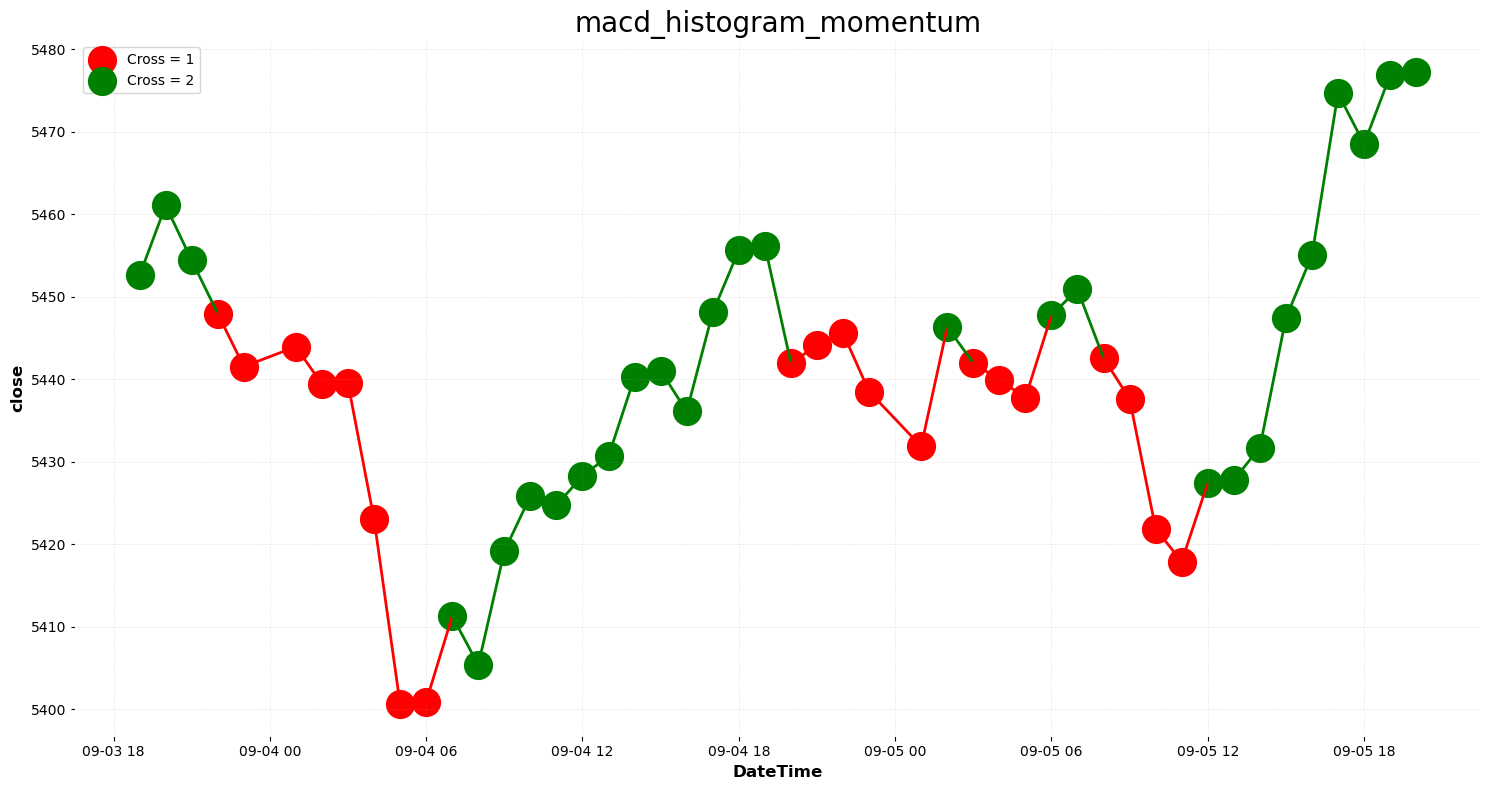

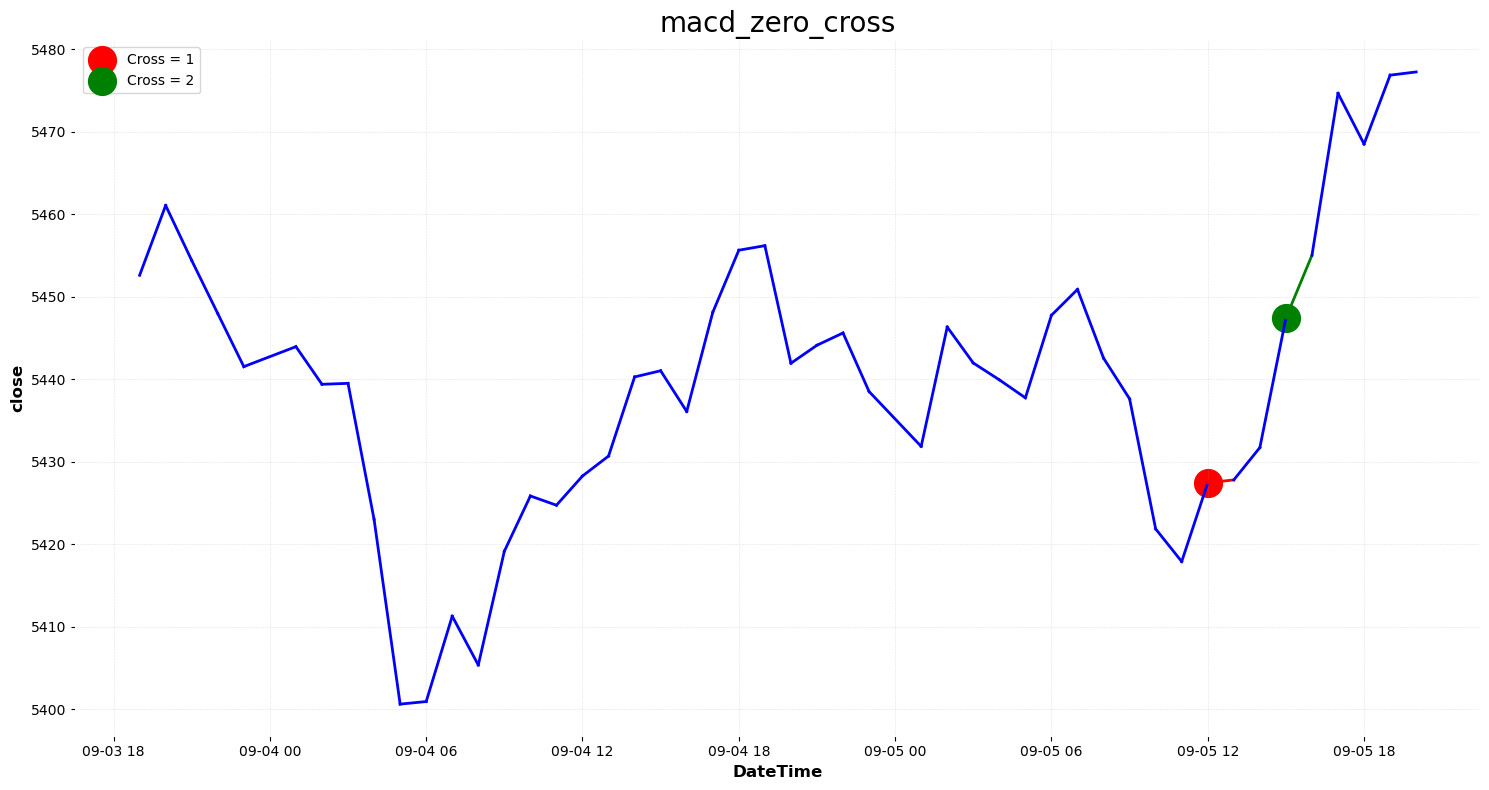

In [41]:
plotter.plot_signals(periods = 48)